# Info
Final Version

In [1]:
# %pip install ace_tools
# %pip install wordcloud

# Libraries

In [2]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from pandas.api.types import is_numeric_dtype, is_string_dtype
import seaborn as sns
from wordcloud import WordCloud

In [3]:
# Loading the Datasets (raw files)
gbr_athlete_list = pd.read_csv("../data/raw/GBR Athlete List.csv")
gbr_comp_results = pd.read_csv("../data/raw/GBR Competition Results.csv")
glb_athlete_list = pd.read_csv("../data/raw/Global Athlete List.csv")
glb_comp_results = pd.read_csv("../data/raw/Global Competition Results.csv")

In [4]:
# Define a central path for processed output
processed_dir = "../data/processed/"

# Step1: Data Exploration

In [5]:
print('GBR Athlete List Description:\n', gbr_athlete_list.describe(include='all'))
print('GBR Competition Results Description:\n', gbr_comp_results.describe())
print('Global Athlete List Description:\n', glb_athlete_list.describe())
print('GBR Competition Results Description:\n', glb_comp_results.describe())

GBR Athlete List Description:
          AthleteGUID   AthleteName AthleteGender Nationality
count   9.175000e+03          9175          9175        9175
unique           NaN          8666             2           1
top              NaN  David Devine    M                  GBR
freq             NaN            25          5567        9175
mean    1.349945e+06           NaN           NaN         NaN
std     1.223091e+05           NaN           NaN         NaN
min     1.000978e+06           NaN           NaN         NaN
25%     1.251754e+06           NaN           NaN         NaN
50%     1.387145e+06           NaN           NaN         NaN
75%     1.455304e+06           NaN           NaN         NaN
max     1.515932e+06           NaN           NaN         NaN
GBR Competition Results Description:
         AthleteGUID  CompetitionID       EventID  PerformanceValues  \
count  1.203420e+05  120342.000000  1.203420e+05      120021.000000   
mean   1.281033e+06  116802.136586  2.755960e+06         

In [6]:
print("GBR Athletes List Shape:\n", gbr_athlete_list.shape)
print("GBR Competition Results Shape:\n", gbr_comp_results.shape)
print("Global Athletes List Shape:\n", glb_athlete_list.shape)
print("GBR Competition Results Shape:\n", glb_comp_results.shape)

GBR Athletes List Shape:
 (9175, 4)
GBR Competition Results Shape:
 (120342, 14)
Global Athletes List Shape:
 (4100, 4)
GBR Competition Results Shape:
 (15363, 14)


In [7]:
print("GBR Athletes List:\n", gbr_athlete_list.head())
print("GBR Competition Results:\n", gbr_comp_results.head())
print("Global Athletes List:\n", glb_athlete_list.head())
print("GBR Competition Results:\n", glb_comp_results.head())

GBR Athletes List:
    AthleteGUID       AthleteName AthleteGender Nationality
0      1119235  Paul Martelletti    M                  GBR
1      1109804    Angela Barrett    W                  GBR
2      1152467     Rachel Forder    W                  GBR
3      1191933    Gilbert Grundy    M                  GBR
4      1140691      Elliot Slade    M                  GBR
GBR Competition Results:
    AthleteGUID  CompetitionID  EventID      dateid     EventName  Terrain  \
0      1119235          76911  1013550  19/05/2019      Marathon  outdoor   
1      1109804          76912  2407887  28/07/2019   Triple Jump  outdoor   
2      1152467          76920   976491  05/05/2019  Discus Throw  outdoor   
3      1191933          76922  2409771  23/03/2019          800m  outdoor   
4      1140691          76923  2412369  20/07/2019          800m  outdoor   

   PerformanceValues PerformanceUnits  CompPosition CompRound CompName  \
0            8637.00          seconds           9.0    Finals  

In [8]:
gbr_athlete_list.head()

,AthleteGUID,AthleteName,AthleteGender,Nationality
0,1119235,Paul Martelletti,M,GBR
1,1109804,Angela Barrett,W,GBR
2,1152467,Rachel Forder,W,GBR
3,1191933,Gilbert Grundy,M,GBR
4,1140691,Elliot Slade,M,GBR


In [9]:
gbr_athlete_list.count()

AthleteGUID      9175
AthleteName      9175
AthleteGender    9175
Nationality      9175
dtype: int64

In [10]:
# Understanding unique values in columns for GBR Athlete List
gbr_athlete_list['AthleteName'].value_counts()

AthleteName
David Devine        25
George Fox           9
Great Britain        4
James Taylor         4
Kyle Keyworth        3
                    ..
Bernice Coulson      1
Shaunna Thompson     1
Jack Paget           1
Hannah Robinson      1
Jessica Watson       1
Name: count, Length: 8666, dtype: int64

In [11]:
gbr_athlete_list['AthleteGUID'].value_counts()

AthleteGUID
1119235    1
1430321    1
1421739    1
1421789    1
1434222    1
          ..
1296254    1
1304240    1
1240634    1
1304915    1
1515930    1
Name: count, Length: 9175, dtype: int64

### GBR

In [12]:
# GBR Athlete List Exploration
print("GBR Athlete List Overview:")
print(gbr_athlete_list.info(), "\n")
print("GBR Athlete List First Few Rows:\n", gbr_athlete_list.head(), "\n")
print("GBR Athlete List Description:\n", gbr_athlete_list.describe(include='all'), "\n")
print("GBR Athlete List Null Values:\n", gbr_athlete_list.isnull().sum(), "\n")

GBR Athlete List Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9175 entries, 0 to 9174
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   AthleteGUID    9175 non-null   int64 
 1   AthleteName    9175 non-null   object
 2   AthleteGender  9175 non-null   object
 3   Nationality    9175 non-null   object
dtypes: int64(1), object(3)
memory usage: 286.8+ KB
None 

GBR Athlete List First Few Rows:
    AthleteGUID       AthleteName AthleteGender Nationality
0      1119235  Paul Martelletti    M                  GBR
1      1109804    Angela Barrett    W                  GBR
2      1152467     Rachel Forder    W                  GBR
3      1191933    Gilbert Grundy    M                  GBR
4      1140691      Elliot Slade    M                  GBR 

GBR Athlete List Description:
          AthleteGUID   AthleteName AthleteGender Nationality
count   9.175000e+03          9175          9175        9175
unique 

9175 x 4

In [13]:
# GBR Competition Results Exploration
print("GBR Competition Results Overview:")
print(gbr_comp_results.info(), "\n")
print("GBR Competition Results First Few Rows:\n", gbr_comp_results.head(), "\n")
print("GBR Competition Results Description:\n", gbr_comp_results.describe(include='all'), "\n")
print("GBR Competition Results Null Values:\n", gbr_comp_results.isnull().sum(), "\n")

GBR Competition Results Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120342 entries, 0 to 120341
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AthleteGUID        120342 non-null  int64  
 1   CompetitionID      120342 non-null  int64  
 2   EventID            120342 non-null  int64  
 3   dateid             120342 non-null  object 
 4   EventName          120342 non-null  object 
 5   Terrain            120342 non-null  object 
 6   PerformanceValues  120021 non-null  float64
 7   PerformanceUnits   120342 non-null  object 
 8   CompPosition       115988 non-null  float64
 9   CompRound          108711 non-null  object 
 10  CompName           49967 non-null   object 
 11  CompVenue          120341 non-null  object 
 12  ValidPerformance   119511 non-null  float64
 13  EventWind          39014 non-null   float64
dtypes: float64(4), int64(3), object(7)
memory usage: 12.9+ MB
None 

G

Observation:

Contains some missing values in columns like PerformanceValues etc

There are NaN values in many columns

120342 x 14

### Global

In [14]:
# Global Athlete List Exploration
print("Global Athlete List Overview:")
print(glb_athlete_list.info(), "\n")
print("Global Athlete List First Few Rows:\n", glb_athlete_list.head(), "\n")
print("Global Athlete List Last Few Rows:\n", glb_athlete_list.tail(2), "\n")
glb_athlete_list.drop(glb_athlete_list.index[-1], inplace=True) # Dropping last row as its taking NaN
print("Global Athlete List Overview After Removing NaN Row:")
print(glb_athlete_list.info(), "\n")
print("Global Athlete List First Few Rows After Removing NaN:\n", glb_athlete_list.head(), "\n")
print("Global Athlete List Last Few Rows After Removing:\n", glb_athlete_list.tail(2), "\n")
print("Global Athlete List Description:\n", glb_athlete_list.describe(include='all'), "\n")
print("Global Athlete List Null Values:\n", glb_athlete_list.isnull().sum(), "\n")

Global Athlete List Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4100 entries, 0 to 4099
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AthleteGUID    4099 non-null   float64
 1   AthleteName    4099 non-null   object 
 2   AthleteGender  4099 non-null   object 
 3   Nationality    4074 non-null   object 
dtypes: float64(1), object(3)
memory usage: 128.3+ KB
None 

Global Athlete List First Few Rows:
    AthleteGUID            AthleteName AthleteGender Nationality
0    1469674.0    Allan Ngitsi Chirwa    M                  MAW
1    1469199.0  Aleksandr Salahudinov    M                  KGZ
2    1464577.0          Onisio Pereia    M                  MOZ
3    1452109.0     Prestina Ochonogor    W                  NGR
4    1441632.0         Hein Htet Aung    M                  MYA 

Global Athlete List Last Few Rows:
       AthleteGUID AthleteName AthleteGender Nationality
4098    1001113.0     Ge

4098 x 4

In [15]:
# Identify the rows with null values in the 'Nationality' column
null_entries = glb_athlete_list[glb_athlete_list['Nationality'].isnull()]
null_entries

,AthleteGUID,AthleteName,AthleteGender,Nationality
25,1430871.0,Joseph Green,M,NaN
97,1371471.0,Ronal Longa,M,NaN
188,1304509.0,Alexa Sulyán,W,NaN
212,1359855.0,Paul McGrath,M,NaN
287,1297286.0,Denisha Cartwright,W,NaN
377,1265313.0,Han Il Ryong,M,NaN
407,1257020.0,Tsegaye Kidanu,M,NaN
967,1212563.0,Hugo Catrileo,M,NaN
1128,1211231.0,Berhane Tesfay,M,NaN
1414,1178755.0,Fotyen Tesfay,W,NaN


In [16]:
null_count = glb_athlete_list['Nationality'].isnull().sum()
print(f"Total null entries in 'Nationality': {null_count}")

Total null entries in 'Nationality': 25


Question: There are 25 entries with Null nationalities but its showing 26 above. 

In [17]:
# Inspect row 4099 specifically to check for discrepancies
row_4099 = glb_athlete_list.iloc[4098]
row_4099

AthleteGUID       1001113.0
AthleteName         Germany
AthleteGender    M         
Nationality             GER
Name: 4098, dtype: object

In [18]:
row_last = glb_athlete_list.iloc[-1]  # Safely accesses the last row
row_last

AthleteGUID       1001113.0
AthleteName         Germany
AthleteGender    M         
Nationality             GER
Name: 4098, dtype: object

Observation:

AthleteName = 'Germany' has two entries due to different Genders (M, F). However, something seems off about this as how can a person be called Germany and have two different entries with different genders. Could be possible data collection error. Can be checked in the next steps. 

Assumption: Germany could be the last name or it could be a data entry error. However, since both have different GUID, I will ignore this

In [19]:
# Global Competition Results Exploration
print("Global Competition Results Overview:")
print(glb_comp_results.info(), "\n")
print("Global Competition Results First Few Rows:\n", glb_comp_results.head(), "\n")
print("Global Competition Results Description:\n", glb_comp_results.describe(include='all'), "\n")
print("Global Competition Results Null Values:\n", glb_comp_results.isnull().sum(), "\n")

Global Competition Results Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15363 entries, 0 to 15362
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AthleteGUID        15363 non-null  int64  
 1   CompetitionID      15363 non-null  int64  
 2   EventID            15363 non-null  int64  
 3   dateid             15363 non-null  object 
 4   EventName          15363 non-null  object 
 5   Terrain            15363 non-null  object 
 6   PerformanceValues  15361 non-null  float64
 7   PerformanceUnits   15363 non-null  object 
 8   CompPosition       13959 non-null  float64
 9   CompRound          14751 non-null  object 
 10  CompName           15363 non-null  object 
 11  CompVenue          15363 non-null  object 
 12  ValidPerformance   15363 non-null  int64  
 13  EventWind          3929 non-null   float64
dtypes: float64(3), int64(4), object(7)
memory usage: 1.6+ MB
None 

Global Competitio

15363 x 14

## 1.1 Filtering/Sampling Data

#### Relevant Track and Field Events

In [20]:
# Define relevant track and field events
relevant_events = [
    "100m", "110m Hurdles", "100m Hurdles", "200m", "400m", 
    "400m Hurdles", "800m", "1500m", "3000m Steeplechase", 
    "5000m", "10000m", "High Jump", "Pole Vault", "Long Jump", 
    "Triple Jump", "Shot Put", "Discus Throw", "Hammer Throw", 
    "Javelin Throw"
]

In [21]:
# Slide 6 says all performances are valid

# Filter GBR Competition Results for relevant events and ValidPerformance
gbr_comp_results_filtered = gbr_comp_results[
    (gbr_comp_results['EventName'].isin(relevant_events)) &
    (gbr_comp_results['ValidPerformance'] == 1)
]

In [22]:
# Filter Global Competition Results for relevant events 
glb_comp_results_filtered = glb_comp_results[
    (glb_comp_results['EventName'].isin(relevant_events)) &
    (glb_comp_results['ValidPerformance'] == 1)
]

#### Joining Atheltic List with Competition Results

In [23]:
gbr_combined = gbr_comp_results_filtered.merge(
    gbr_athlete_list, on="AthleteGUID", how="inner"
)

In [24]:
glb_combined = glb_comp_results_filtered.merge(
    glb_athlete_list, on="AthleteGUID", how="inner"
)

In [25]:
# Display the filtered and combined dataframes to ensure correctness
print(gbr_combined.head())
print("global: ")
print(glb_combined.head())

   AthleteGUID  CompetitionID  EventID      dateid     EventName  Terrain  \
0      1109804          76912  2407887  28/07/2019   Triple Jump  outdoor   
1      1152467          76920   976491  05/05/2019  Discus Throw  outdoor   
2      1191933          76922  2409771  23/03/2019          800m  outdoor   
3      1140691          76923  2412369  20/07/2019          800m  outdoor   
4      1266893          76923   973745  13/07/2019          100m  outdoor   

   PerformanceValues PerformanceUnits  CompPosition CompRound CompName  \
0              13.05           metres           1.0    Finals       NC   
1              38.45           metres           7.0    Finals      NaN   
2             114.70          seconds           5.0    Finals      NaN   
3             114.00          seconds           1.0    Finals      NaN   
4              18.97          seconds           8.0    Finals      NaN   

    CompVenue  ValidPerformance  EventWind     AthleteName AthleteGender  \
0   Innsbruck   

In [26]:
print('GBR: ', gbr_combined.info())
print('Global: ', glb_combined.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96244 entries, 0 to 96243
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AthleteGUID        96244 non-null  int64  
 1   CompetitionID      96244 non-null  int64  
 2   EventID            96244 non-null  int64  
 3   dateid             96244 non-null  object 
 4   EventName          96244 non-null  object 
 5   Terrain            96244 non-null  object 
 6   PerformanceValues  96244 non-null  float64
 7   PerformanceUnits   96244 non-null  object 
 8   CompPosition       93092 non-null  float64
 9   CompRound          86153 non-null  object 
 10  CompName           42414 non-null  object 
 11  CompVenue          96243 non-null  object 
 12  ValidPerformance   96244 non-null  float64
 13  EventWind          37909 non-null  float64
 14  AthleteName        96244 non-null  object 
 15  AthleteGender      96244 non-null  object 
 16  Nationality        962

In [27]:
# Save the filtered and combined DataFrames to CSV files
gbr_combined.to_csv(processed_dir + "Filtered_GBR_Competition_Results.csv", index=False)
glb_combined.to_csv(processed_dir + "Filtered_Global_Competition_Results.csv", index=False)

print("DataFrames have been saved successfully as CSV files")

DataFrames have been saved successfully as CSV files


In [28]:
glb_combined.head(2)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompName,CompVenue,ValidPerformance,EventWind,AthleteName,AthleteGender,Nationality
0,1469674,134418,2988487,22/08/2023,800m,outdoor,111.62,seconds,9.0,Heats,WC,Budapest,1,NaN,Allan Ngitsi Chirwa,M,MAW
1,1464577,134418,2988039,19/08/2023,100m,outdoor,10.89,seconds,2.0,Single race,WC,Budapest,1,-0.8,Onisio Pereia,M,MOZ


In [29]:
glb_combined.tail(2)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompName,CompVenue,ValidPerformance,EventWind,AthleteName,AthleteGender,Nationality
12522,1003838,134418,2988102,20/08/2023,800m,outdoor,134.03,seconds,NaN,Heats,WC,Budapest,1,NaN,Yekaterina Voronina,W,NaN
12523,1003838,134418,2988084,20/08/2023,Javelin Throw,outdoor,50.02,metres,NaN,Heats,WC,Budapest,1,NaN,Yekaterina Voronina,W,NaN


### Concatinating GBR with Global 

In [30]:
gbr_combined.columns

Index(['AthleteGUID', 'CompetitionID', 'EventID', 'dateid', 'EventName',
       'Terrain', 'PerformanceValues', 'PerformanceUnits', 'CompPosition',
       'CompRound', 'CompName', 'CompVenue', 'ValidPerformance', 'EventWind',
       'AthleteName', 'AthleteGender', 'Nationality'],
      dtype='object')

In [31]:
glb_combined.columns

Index(['AthleteGUID', 'CompetitionID', 'EventID', 'dateid', 'EventName',
       'Terrain', 'PerformanceValues', 'PerformanceUnits', 'CompPosition',
       'CompRound', 'CompName', 'CompVenue', 'ValidPerformance', 'EventWind',
       'AthleteName', 'AthleteGender', 'Nationality'],
      dtype='object')

In [32]:
glb_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12524 entries, 0 to 12523
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   AthleteGUID        12524 non-null  int64  
 1   CompetitionID      12524 non-null  int64  
 2   EventID            12524 non-null  int64  
 3   dateid             12524 non-null  object 
 4   EventName          12524 non-null  object 
 5   Terrain            12524 non-null  object 
 6   PerformanceValues  12524 non-null  float64
 7   PerformanceUnits   12524 non-null  object 
 8   CompPosition       11186 non-null  float64
 9   CompRound          11912 non-null  object 
 10  CompName           12524 non-null  object 
 11  CompVenue          12524 non-null  object 
 12  ValidPerformance   12524 non-null  int64  
 13  EventWind          3920 non-null   float64
 14  AthleteName        12524 non-null  object 
 15  AthleteGender      12524 non-null  object 
 16  Nationality        124

#### Introducing a Flag column to differentiate between national and international GBR athletes

In [33]:
# Step 3.1: Add descriptive flags to indicate GBR and Global data
gbr_combined['Flag'] = 'GBR'    # GBR athletes
glb_combined['Flag'] = 'Global'  # Global athletes

In [34]:
print("gbr: ", gbr_combined.head(1))
print("global: ", glb_combined.head(1))

gbr:     AthleteGUID  CompetitionID  EventID      dateid    EventName  Terrain  \
0      1109804          76912  2407887  28/07/2019  Triple Jump  outdoor   

   PerformanceValues PerformanceUnits  CompPosition CompRound CompName  \
0              13.05           metres           1.0    Finals       NC   

   CompVenue  ValidPerformance  EventWind     AthleteName AthleteGender  \
0  Innsbruck               1.0       -0.6  Angela Barrett    W            

  Nationality Flag  
0         GBR  GBR  
global:     AthleteGUID  CompetitionID  EventID      dateid EventName  Terrain  \
0      1469674         134418  2988487  22/08/2023      800m  outdoor   

   PerformanceValues PerformanceUnits  CompPosition CompRound CompName  \
0             111.62          seconds           9.0     Heats       WC   

  CompVenue  ValidPerformance  EventWind          AthleteName AthleteGender  \
0  Budapest                 1        NaN  Allan Ngitsi Chirwa    M            

  Nationality    Flag  
0         M

In [35]:
all_info = pd.concat([gbr_combined, glb_combined], ignore_index=True)

In [36]:
all_info.shape

(108768, 18)

In [37]:
print("Information of one big combined table: ", all_info.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108768 entries, 0 to 108767
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   AthleteGUID        108768 non-null  int64  
 1   CompetitionID      108768 non-null  int64  
 2   EventID            108768 non-null  int64  
 3   dateid             108768 non-null  object 
 4   EventName          108768 non-null  object 
 5   Terrain            108768 non-null  object 
 6   PerformanceValues  108768 non-null  float64
 7   PerformanceUnits   108768 non-null  object 
 8   CompPosition       104278 non-null  float64
 9   CompRound          98065 non-null   object 
 10  CompName           54938 non-null   object 
 11  CompVenue          108767 non-null  object 
 12  ValidPerformance   108768 non-null  float64
 13  EventWind          41829 non-null   float64
 14  AthleteName        108768 non-null  object 
 15  AthleteGender      108768 non-null  object 
 16  Na

In [38]:
# Summary Statistics
# print("Summary of All Infor:\n", all_info.describe(include='all'), "\n")

# Unique values in categorical columns
# print("All Info Unique Values:\n", all_info.nunique(), "\n")

# Null Value Analysis
print("All Info Null Values:\n", all_info.isnull().sum(), "\n")

# Distribution of Performance Values
# print("All Info Performance Values Description:\n", all_info['PerformanceValues'].describe(), "\n")

# Checking distribution of Competition Positions
# print("All Info Competition Positions:\n", all_info['CompPosition'].value_counts().head(10), "\n")


All Info Null Values:
 AthleteGUID              0
CompetitionID            0
EventID                  0
dateid                   0
EventName                0
Terrain                  0
PerformanceValues        0
PerformanceUnits         0
CompPosition          4490
CompRound            10703
CompName             53830
CompVenue                1
ValidPerformance         0
EventWind            66939
AthleteName              0
AthleteGender            0
Nationality             56
Flag                     0
dtype: int64 



#### Saving

In [39]:
# Save all_info in the same directory
all_info.to_csv(processed_dir + "all_info.csv", index=False)

print("DataFrame has been saved successfully as CSV file")

DataFrame has been saved successfully as CSV file


# Step 2: Data Cleaning

All filtered values have a validperformance value of 1 and with the required fields only

## 2.1: Dropping Unnecessary Columns: Not Missing Values
These are the columns that are not required in the business problem without investigating the missing values etc

In [40]:
all_info.columns

Index(['AthleteGUID', 'CompetitionID', 'EventID', 'dateid', 'EventName',
       'Terrain', 'PerformanceValues', 'PerformanceUnits', 'CompPosition',
       'CompRound', 'CompName', 'CompVenue', 'ValidPerformance', 'EventWind',
       'AthleteName', 'AthleteGender', 'Nationality', 'Flag'],
      dtype='object')

##### Decision: 
Drop Columns: ValidPerformance, CompName as they are not relevant 

CompName: CompID is there to identify the competition

In [41]:
all_info = all_info.drop(columns=['ValidPerformance', 'CompName'])
print("Columns Dropped")

Columns Dropped


In [42]:
# Verify the shape and remaining columns
print("Columns after dropping unnecessary ones:\n", all_info.columns)
print("New shape of all_info:", all_info.shape)

Columns after dropping unnecessary ones:
 Index(['AthleteGUID', 'CompetitionID', 'EventID', 'dateid', 'EventName',
       'Terrain', 'PerformanceValues', 'PerformanceUnits', 'CompPosition',
       'CompRound', 'CompVenue', 'EventWind', 'AthleteName', 'AthleteGender',
       'Nationality', 'Flag'],
      dtype='object')
New shape of all_info: (108768, 16)


## 2.2: Format Standardisation
Ensuring consistent formats for:
1.	Date Columns (dateid):
•	Convert to a standard datetime format for easier analysis.
2.	Numerical Columns:
•	Ensure numerical columns (PerformanceValues, EventWind, etc.) have consistent data types (float or int as appropriate).
3.	Categorical Columns:
•	Verify and enforce the categorical type for columns like EventName, CompRound, and AthleteGender to optimize storage and computation.


In [43]:
all_info.head(1)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,EventWind,AthleteName,AthleteGender,Nationality,Flag
0,1109804,76912,2407887,28/07/2019,Triple Jump,outdoor,13.05,metres,1.0,Finals,Innsbruck,-0.6,Angela Barrett,W,GBR,GBR


#### Decision
Time-based events (100m, 200m, etc.) naturally use seconds.

Distance-based events (Long Jump, Shot Put, etc.) use meters.

So I will keep the units as they are without normalising them for better understanding

In [44]:
print(all_info.dtypes)

AthleteGUID            int64
CompetitionID          int64
EventID                int64
dateid                object
EventName             object
Terrain               object
PerformanceValues    float64
PerformanceUnits      object
CompPosition         float64
CompRound             object
CompVenue             object
EventWind            float64
AthleteName           object
AthleteGender         object
Nationality           object
Flag                  object
dtype: object


In [45]:
# Format standardization for all_info

# Standardize date column
if 'dateid' in all_info.columns:
    all_info['dateid'] = pd.to_datetime(all_info['dateid'], errors='coerce')  # Convert to datetime

# Ensure categorical columns are treated as such
categorical_cols = ['EventName', 'CompRound', 'AthleteGender', 'Nationality', 'CompVenue']
for col in categorical_cols:
    if col in all_info.columns and is_string_dtype(all_info[col]):
        all_info[col] = all_info[col].astype('category')  # Convert to category type

# Verify results
print("Date Column Example:\n", all_info['dateid'].head())
print("Data Types After Standardization:\n", all_info.dtypes)

Date Column Example:
 0   2019-07-28
1   2019-05-05
2   2019-03-23
3   2019-07-20
4   2019-07-13
Name: dateid, dtype: datetime64[ns]
Data Types After Standardization:
 AthleteGUID                   int64
CompetitionID                 int64
EventID                       int64
dateid               datetime64[ns]
EventName                  category
Terrain                      object
PerformanceValues           float64
PerformanceUnits             object
CompPosition                float64
CompRound                    object
CompVenue                    object
EventWind                   float64
AthleteName                  object
AthleteGender              category
Nationality                  object
Flag                         object
dtype: object


/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/581154044.py:5: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  all_info['dateid'] = pd.to_datetime(all_info['dateid'], errors='coerce')  # Convert to datetime


Note: Some columns did not change to categorical. Can be checked after treating missing values at later steps.

## 2.3: Treat Special Characters, Space, and Case Consistency
1.	Trim Extra Spaces:
•	Remove leading/trailing spaces in categorical/text columns.
2.	Standardize Case:
•	Convert text columns to lowercase for consistency.
3.	Remove Special Characters:
•	Clean any special characters from relevant columns like EventName or CompVenue.

In [46]:
# Clean and standardize text data
def clean_text_columns(df):
    for col in df.select_dtypes(include=['object']).columns:  # Iterate over text columns
        df[col] = df[col].str.strip()  # Remove leading/trailing white spaces
        df[col] = df[col].str.lower()  # Convert to lowercase
        df[col] = df[col].str.replace(r"[^a-zA-Z0-9\s]", "", regex=True)  # Remove special characters

# Apply the cleaning function
clean_text_columns(all_info)

# Verify the cleaned text columns
print("Sample data after cleaning text columns:\n", all_info.head(1))

Sample data after cleaning text columns:
    AthleteGUID  CompetitionID  EventID     dateid    EventName  Terrain  \
0      1109804          76912  2407887 2019-07-28  Triple Jump  outdoor   

   PerformanceValues PerformanceUnits  CompPosition CompRound  CompVenue  \
0              13.05           metres           1.0    finals  innsbruck   

   EventWind     AthleteName AthleteGender Nationality Flag  
0       -0.6  angela barrett    W                  gbr  gbr  


In [47]:
all_info.shape

(108768, 16)

## 2.4: Treating Duplicated Rows


In [48]:
# Check for duplicate rows
print("Number of Duplicated Rows:\n", all_info.duplicated().sum())

Number of Duplicated Rows:
 79


In [49]:
# # Save all_info in the same directory to check in SQL
# all_info.to_csv(processed_dir + "all_info_dup.csv", index=False)

# print("DataFrame has been saved successfully as CSV file")

In [50]:
all_info[all_info.duplicated()]

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,EventWind,AthleteName,AthleteGender,Nationality,Flag
20,1172446,76940,2383701,2019-06-26,800m,outdoor,106.21,seconds,3.0,finals,goleniw,NaN,jamie webb,M,gbr,gbr
1492,1172446,77603,2450809,2019-08-24,800m,outdoor,108.65,seconds,2.0,heats,birmingham,NaN,jamie webb,M,gbr,gbr
1524,1172446,77603,2451207,2019-08-25,800m,outdoor,106.84,seconds,3.0,finals,birmingham,NaN,jamie webb,M,gbr,gbr
1752,1172446,77603,2413499,2019-02-09,800m,indoor,108.81,seconds,1.0,heats,birmingham,NaN,jamie webb,M,gbr,gbr
3321,1172446,78311,2389063,2019-08-18,800m,outdoor,106.38,seconds,4.0,finals,birmingham,NaN,jamie webb,M,gbr,gbr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77082,1172446,134895,3128103,2024-06-22,800m,outdoor,109.39,seconds,8.0,finals,wien,NaN,jamie webb,M,gbr,gbr
90649,1172446,141189,3122643,2024-06-12,800m,outdoor,108.98,seconds,4.0,finals,watford,NaN,jamie webb,M,gbr,gbr
91772,1172446,141560,3122852,2024-06-15,800m,outdoor,113.94,seconds,11.0,finals,belfast,NaN,jamie webb,M,gbr,gbr
100381,1172446,81430,2452402,2019-09-28,800m,outdoor,106.23,seconds,3.0,heats,doha,NaN,jamie webb,M,gbr,global


In [51]:
# Drop duplicate rows
all_info.drop_duplicates(inplace=True)

# Verify duplicates are removed
duplicate_count_after = all_info.duplicated().sum()
print(f"Number of duplicate rows after removal: {duplicate_count_after}")
all_info.shape

Number of duplicate rows after removal: 0


(108689, 16)

## 2.5: Treating Missing Values

In [52]:
# 1. Handle Missing Values
print("Missing Values in all info:\n", all_info.isnull().sum())

Missing Values in all info:
 AthleteGUID              0
CompetitionID            0
EventID                  0
dateid                   0
EventName                0
Terrain                  0
PerformanceValues        0
PerformanceUnits         0
CompPosition          4480
CompRound            10693
CompVenue                1
EventWind            66861
AthleteName              0
AthleteGender            0
Nationality             56
Flag                     0
dtype: int64


Based on the NULL values: 

As EventWind has 66487 entries out of a total of 108145, it is better to remove this column than to treat it with average or assumed value as that can most likely confuse the model and give very wrong predictions.



In [53]:
all_info.columns

Index(['AthleteGUID', 'CompetitionID', 'EventID', 'dateid', 'EventName',
       'Terrain', 'PerformanceValues', 'PerformanceUnits', 'CompPosition',
       'CompRound', 'CompVenue', 'EventWind', 'AthleteName', 'AthleteGender',
       'Nationality', 'Flag'],
      dtype='object')

In [54]:
# Checking Correlations to decide on column removal

# Check correlation between EventWind and PerformanceValues
correlation = all_info['EventWind'].corr(all_info['PerformanceValues'])
print(f"Correlation between EventWind and PerformanceValues: {correlation}")

correlation_pos = all_info['EventWind'].corr(all_info['CompPosition'])
print(f"Correlation between EventWind and Competition Position: {correlation_pos}")

Correlation between EventWind and PerformanceValues: -0.009510055148527152
Correlation between EventWind and Competition Position: 0.019007377252278152


#### Decision
##### Dropping Columns:
EventWind column can be dropped as very weak correlation

In [55]:
all_info = all_info.drop(columns= 'EventWind')
print("EventWind Column Dropped")

EventWind Column Dropped


In [56]:
print(all_info.columns)
print(all_info.shape)

Index(['AthleteGUID', 'CompetitionID', 'EventID', 'dateid', 'EventName',
       'Terrain', 'PerformanceValues', 'PerformanceUnits', 'CompPosition',
       'CompRound', 'CompVenue', 'AthleteName', 'AthleteGender', 'Nationality',
       'Flag'],
      dtype='object')
(108689, 15)


##### Treating columns:

CompRound: Dropping all rows with Null Values

CompVenue: Dropping row (1 value only with 5 position)

CompPosition: Dropping rows with null values, 0 and -1 which don't make sense

Nationality: 'unknown' placeholder

In [57]:
# Check initial shape
initial_shape = all_info.shape
print(f"Initial number of rows: {initial_shape[0]}")

# Drop rows where CompRound is null
all_info = all_info[all_info['CompRound'].notnull()]

# Verify the shape after dropping rows
final_shape = all_info.shape
print(f"Number of rows after dropping rows with null CompRound: {final_shape[0]}")
print(f"Number of rows removed: {initial_shape[0] - final_shape[0]}")

Initial number of rows: 108689
Number of rows after dropping rows with null CompRound: 97996
Number of rows removed: 10693


In [58]:
# Drop rows where CompRound is null
all_info = all_info[all_info['CompVenue'].notnull()]
all_info.shape

(97995, 15)

In [59]:
print("Missing Values in all info:\n", all_info.isnull().sum())

Missing Values in all info:
 AthleteGUID             0
CompetitionID           0
EventID                 0
dateid                  0
EventName               0
Terrain                 0
PerformanceValues       0
PerformanceUnits        0
CompPosition         2270
CompRound               0
CompVenue               0
AthleteName             0
AthleteGender           0
Nationality            56
Flag                    0
dtype: int64


In [60]:
# Remove rows where CompPosition is null, 0, or -1
all_info = all_info[all_info['CompPosition'].notnull() & (all_info['CompPosition'] > 0)]

# Verify the new shape of the dataset
print("New shape of all_info:", all_info.shape)

New shape of all_info: (95721, 15)


In [61]:
print("Missing Values in all info:\n", all_info.isnull().sum())

Missing Values in all info:
 AthleteGUID           0
CompetitionID         0
EventID               0
dateid                0
EventName             0
Terrain               0
PerformanceValues     0
PerformanceUnits      0
CompPosition          0
CompRound             0
CompVenue             0
AthleteName           0
AthleteGender         0
Nationality          38
Flag                  0
dtype: int64


In [62]:
# Display rows where Nationality is null
rows_with_null_nationality = all_info[all_info['Nationality'].isnull()]

# Display the rows
print(f"Number of rows where Nationality is null: {len(rows_with_null_nationality)}")
# print(rows_with_null_nationality)

Number of rows where Nationality is null: 38


In [63]:
# Investigate rows with null Nationality to see if they belong to GBR
missing_nationalities = all_info[all_info['Nationality'].isnull()]
print(missing_nationalities[['AthleteName', 'EventName', 'CompVenue', 'Nationality', 'Flag']])

                       AthleteName           EventName  CompVenue Nationality  \
96265                 joseph green                100m   budapest         NaN   
96266                 joseph green                100m   budapest         NaN   
96267                 joseph green                100m      paris         NaN   
96268                 joseph green                200m  eugene or         NaN   
96374                  ronal longa                100m      paris         NaN   
96526                  alexa sulyn                200m   budapest         NaN   
96707           denisha cartwright        100m Hurdles      paris         NaN   
96708           denisha cartwright        100m Hurdles      paris         NaN   
99885                fotyen tesfay              10000m      paris         NaN   
102078  annesofie hartmann nielsen        Discus Throw   budapest         NaN   
102272       katrine koch jacobsen        Hammer Throw  eugene or         NaN   
102273       katrine koch ja

In [64]:
all_info['Nationality'].fillna('unknown', inplace=True)

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/3673855762.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  all_info['Nationality'].fillna('unknown', inplace=True)


In [65]:
print("Missing Values in all info:\n", all_info.isnull().sum())

Missing Values in all info:
 AthleteGUID          0
CompetitionID        0
EventID              0
dateid               0
EventName            0
Terrain              0
PerformanceValues    0
PerformanceUnits     0
CompPosition         0
CompRound            0
CompVenue            0
AthleteName          0
AthleteGender        0
Nationality          0
Flag                 0
dtype: int64


#### Saving the pre-processed csv

In [66]:
print("Final shape of all_info:", all_info.shape)

Final shape of all_info: (95721, 15)


In [67]:
all_info.to_csv(processed_dir + "all_info_treated.csv", index=False)
print('File saved')

File saved


In [68]:
all_info_finals = all_info[all_info['CompRound'] == 'finals'] # contains entries from all events and all positions including national/GBR and International/global in the Final round

## 2.6: Visualising Cleaned Data  

In [69]:
print("Final shape of all_info:", all_info.shape)

Final shape of all_info: (95721, 15)


In [70]:
all_info_finals = all_info[all_info['CompRound'] == 'finals'] # contains entries from all events and all positions including national/GBR and International/global in the Final round

Note: Using all_info (treated/cleaned) dataframe which is saved as all_info_treated.csv

In [71]:
# Filtering for GBR only
gbr_combined_athletes = all_info[all_info['Nationality'] == 'gbr']
print("Count of GBR Athletes: ", len(gbr_combined_athletes))

Count of GBR Athletes:  85035


### Medal Count by Event Globally

In [72]:
gbr_global_medals = all_info_finals[(all_info_finals['Nationality'] == 'gbr') &
                                    (all_info_finals['Flag'] == 'global') &
                                    (all_info_finals['CompPosition'] <= 3)
]

In [73]:
# gbr_global_medals.count()

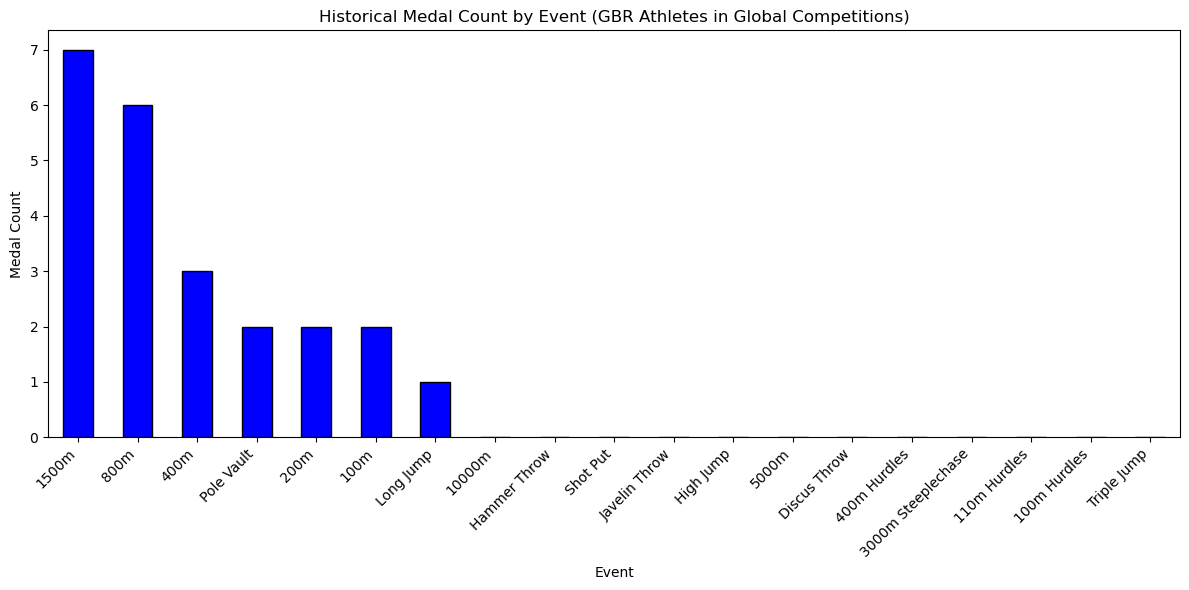

In [74]:
# Group by EventName to calculate medal counts
medal_count = gbr_global_medals['EventName'].value_counts()

# Plot: Medal Count by Event
plt.figure(figsize=(12, 6))
medal_count.plot(kind='bar', color='blue', edgecolor='black')
plt.title("Historical Medal Count by Event (GBR Athletes in Global Competitions)")
plt.xlabel("Event")
plt.ylabel("Medal Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
gbr_global_medals.count()

AthleteGUID          23
CompetitionID        23
EventID              23
dateid               23
EventName            23
Terrain              23
PerformanceValues    23
PerformanceUnits     23
CompPosition         23
CompRound            23
CompVenue            23
AthleteName          23
AthleteGender        23
Nationality          23
Flag                 23
dtype: int64

### Gender Distribution for Medalists (Global)

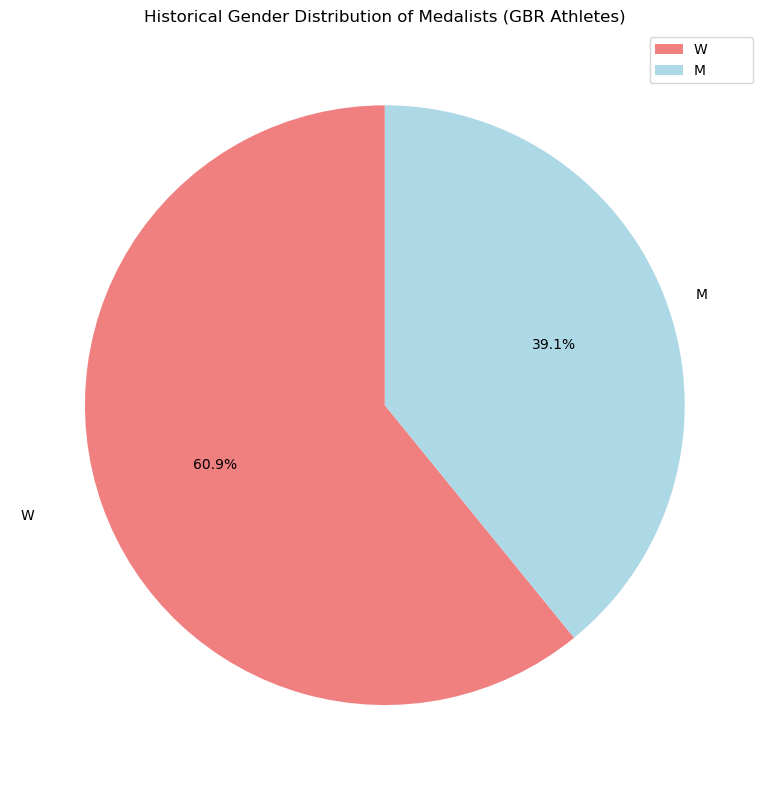

In [76]:
# Group by AthleteGender to calculate medal counts
gender_distribution = gbr_global_medals['AthleteGender'].value_counts()

# Plot: Gender Distribution as a Pie Chart
plt.figure(figsize=(8, 8))
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'], legend=True)
plt.title("Historical Gender Distribution of Medalists (GBR Athletes)")
plt.ylabel("")  # Remove y-axis label for a cleaner look
plt.tight_layout()
plt.show()

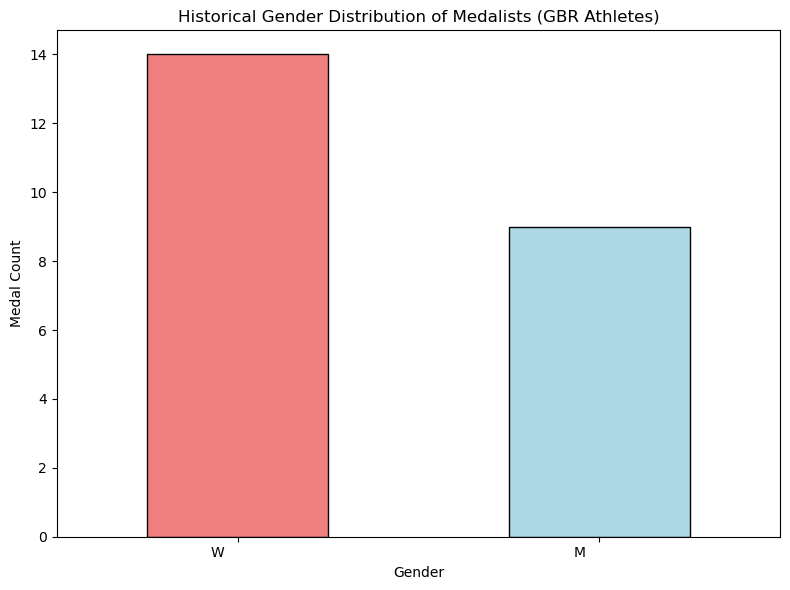

In [77]:
# Alternatively: Bar Chart
plt.figure(figsize=(8, 6))
gender_distribution.plot(kind='bar', color=['lightcoral', 'lightblue'], edgecolor='black')
plt.title("Historical Gender Distribution of Medalists (GBR Athletes)")
plt.xlabel("Gender")
plt.ylabel("Medal Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [78]:
gbr_global_medals.head(1)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag
98563,1221587,112541,2658994,2021-08-03,800m,outdoor,115.88,seconds,2.0,finals,tokyo,keely hodgkinson,W,gbr,global


### Medal Trend Over Time (Global)

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/4061383849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_global_medals['year'] = pd.to_datetime(gbr_global_medals['dateid'], format='%d/%m/%Y').dt.year


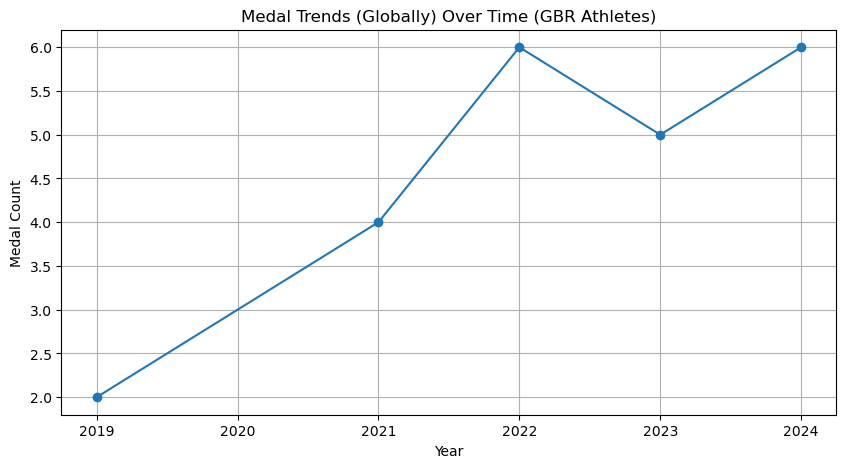

In [79]:
# Ensure year extraction from dateid
gbr_global_medals['year'] = pd.to_datetime(gbr_global_medals['dateid'], format='%d/%m/%Y').dt.year

# Filter for medal positions and group by year
medal_trends = gbr_global_medals.groupby('year').size()

# Plot
plt.figure(figsize=(10, 5))
medal_trends.plot(kind='line', marker='o')
plt.title("Medal Trends (Globally) Over Time (GBR Athletes)")
plt.xlabel("Year")
plt.ylabel("Medal Count")
plt.grid()
plt.show()

### Heatmap for Areas of Strength and Improvement 

Purpose: 

To compare the average performance of GBR medalists and global medalists across events.

Highlight areas where GBR athletes excel (strengths) or lag behind (improvement areas).

### Heatmap: GBR Performances vs Global Performances (All Athletes)

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2128040225.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('EventName')['PerformanceValues'].mean().reset_index(name='GBR_AvgPerformance')
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2128040225.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ].groupby('EventName')['PerformanceValues'].mean().reset_index(name='Global_AvgPerformance')
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2128040225.py:26: FutureWarning: The default value of observed=False is deprecated and will change to observed=Tru

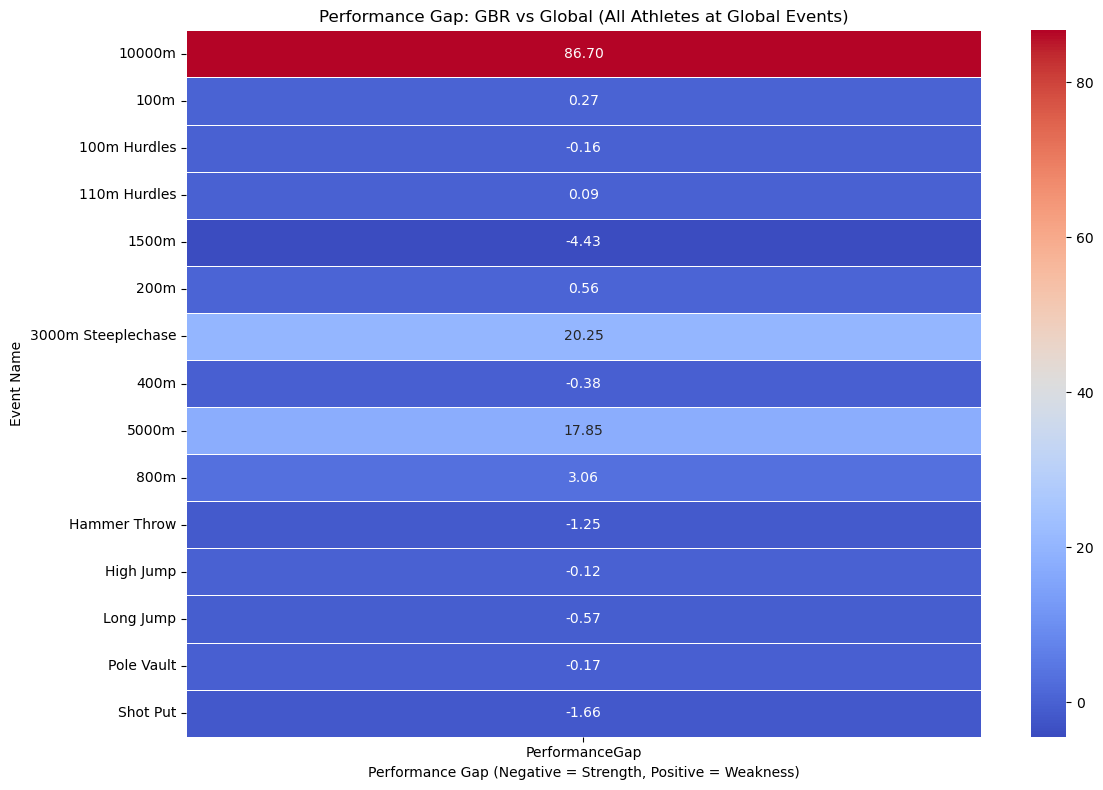

In [80]:
# Step 1: Calculate Mean Performance for GBR Athletes at Global Level
gbr_global_performance = all_info_finals[
    (all_info_finals['Nationality'] == 'gbr') &  # GBR athletes only
    (all_info_finals['Flag'] == 'global')  # Global events only
].groupby('EventName')['PerformanceValues'].mean().reset_index(name='GBR_AvgPerformance')

# Step 2: Calculate Mean Performance for All Non-GBR Global Athletes
global_performance = all_info_finals[
    (all_info_finals['Flag'] == 'global') &  # Global events only
    (all_info_finals['Nationality'] != 'gbr')  # Exclude GBR athletes
].groupby('EventName')['PerformanceValues'].mean().reset_index(name='Global_AvgPerformance')

# Step 3: Merge GBR and Global Data for Comparison
performance_comparison_all = pd.merge(
    gbr_global_performance, 
    global_performance, 
    on='EventName', 
    how='inner'
)

# Step 4: Calculate Performance Gap
performance_comparison_all['PerformanceGap'] = performance_comparison_all['GBR_AvgPerformance'] - performance_comparison_all['Global_AvgPerformance']

# Step 5: Create Heatmap
plt.figure(figsize=(12, 8))
heatmap_data_all = performance_comparison_all.pivot_table(index='EventName', values='PerformanceGap')
sns.heatmap(
    heatmap_data_all, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    linewidths=0.5, 
    fmt=".2f"
)
plt.title("Performance Gap: GBR vs Global (All Athletes at Global Events)")
plt.xlabel("Performance Gap (Negative = Strength, Positive = Weakness)")
plt.ylabel("Event Name")
plt.tight_layout()
plt.show()

Removing outliers to have a better picture

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/3895757267.py:18: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  heatmap_data_filtered = filtered_data.pivot_table(index='EventName', values='PerformanceGap')


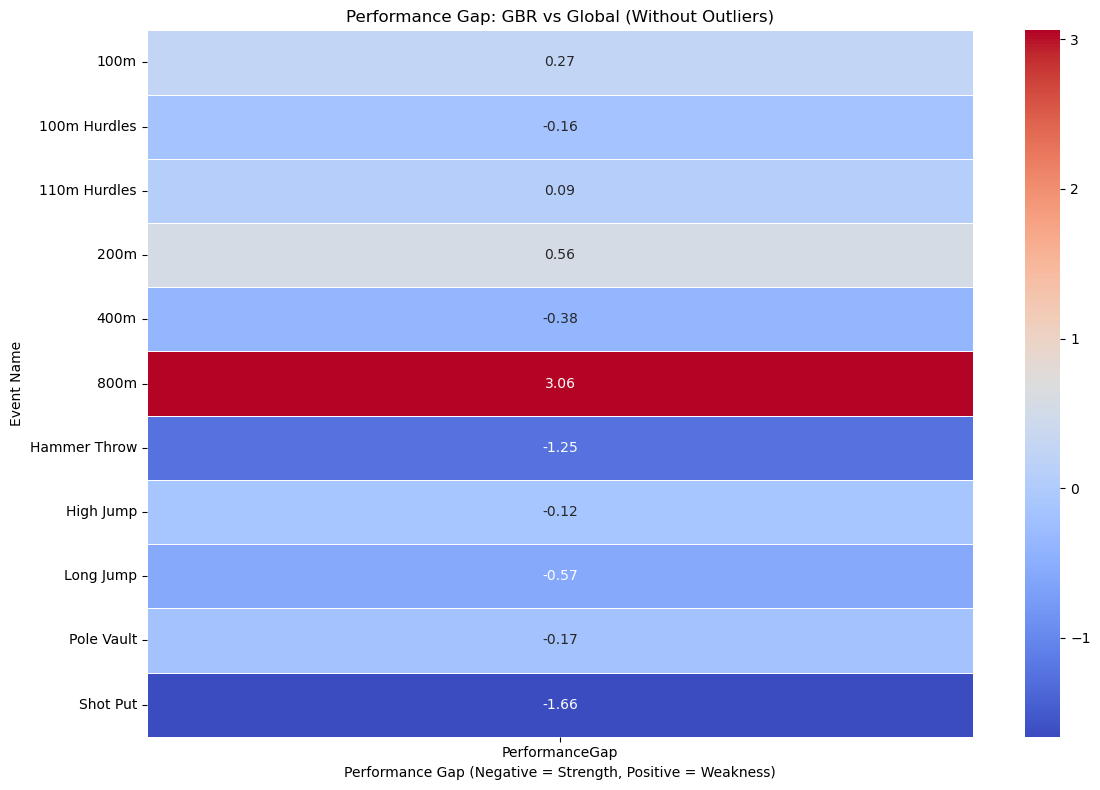

In [81]:
# Step 1: Calculate IQR for Performance Gap
Q1 = performance_comparison_all['PerformanceGap'].quantile(0.25)
Q3 = performance_comparison_all['PerformanceGap'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds for non-outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Filter Out Outliers
filtered_data = performance_comparison_all[
    (performance_comparison_all['PerformanceGap'] >= lower_bound) &
    (performance_comparison_all['PerformanceGap'] <= upper_bound)
]

# Step 3: Create Heatmap Without Outliers
plt.figure(figsize=(12, 8))
heatmap_data_filtered = filtered_data.pivot_table(index='EventName', values='PerformanceGap')
sns.heatmap(
    heatmap_data_filtered, 
    annot=True, 
    cmap='coolwarm', 
    cbar=True, 
    linewidths=0.5, 
    fmt=".2f"
)
plt.title("Performance Gap: GBR vs Global (Without Outliers)")
plt.xlabel("Performance Gap (Negative = Strength, Positive = Weakness)")
plt.ylabel("Event Name")
plt.tight_layout()
plt.show()

In [82]:
gbr_combined_athletes.head(1)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag
0,1109804,76912,2407887,2019-07-28,Triple Jump,outdoor,13.05,metres,1.0,finals,innsbruck,angela barrett,W,gbr,gbr


### Relationship Between GBR Athlete Participation and Medal Wins
Purpose: Demonstrates the relationship between participation levels and success.

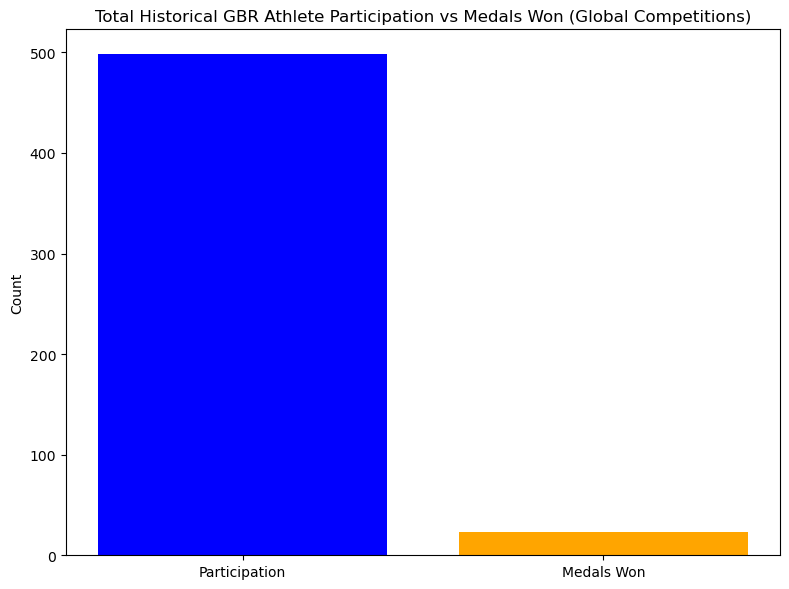

In [83]:
# Step 1: Calculate Total Participation (from all_info)
# Filter GBR athletes participating globally
participation_data = all_info[
    (all_info['Nationality'] == 'gbr') &  # GBR athletes only
    (all_info['Flag'] == 'global')  # Global competitions only
]

# Count unique athlete-event combinations for participation
# Count unique athlete-event combinations
total_participation = participation_data.shape[0]

# Step 2: Calculate Total Medals Won (from gbr_global_medals)
# Count unique athlete-event combinations for medal wins
total_medals_won = gbr_global_medals.shape[0]

# Step 3: Create a Single DataFrame for Visualization
participation_vs_medals = pd.DataFrame({
    'Category': ['Participation', 'Medals Won'],
    'Count': [total_participation, total_medals_won]
})

# Step 4: Plot the Relationship
plt.figure(figsize=(8, 6))
plt.bar(participation_vs_medals['Category'], participation_vs_medals['Count'], color=['blue', 'orange'])
plt.title("Total Historical GBR Athlete Participation vs Medals Won (Global Competitions)")
plt.ylabel("Count")
plt.tight_layout()

# Display the Plot
plt.show()

### Performance Trends by Team Composition (GBR Athletes Globally)

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2304067840.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_global_participation['Year'] = pd.to_datetime(gbr_global_participation['dateid']).dt.year
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2304067840.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gbr_global_participation['AthleteGender'] = gbr_global_participation['AthleteGender'].str.upper().str.strip()  # Ensure 'M' and 'W' are consistent


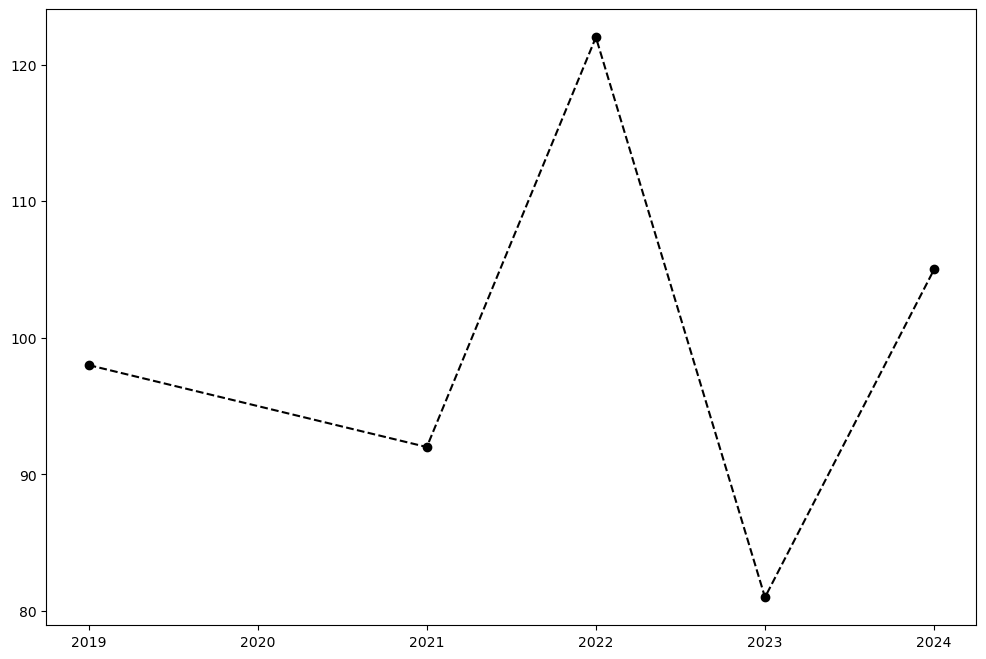

In [84]:
# Step 1: Filter GBR Athletes Participating in Global Competitions
gbr_global_participation = all_info[
    (all_info['Nationality'] == 'gbr') &  # GBR athletes only
    (all_info['Flag'] == 'global')  # Global competitions only
]

# Step 2: Extract Year from Competition Dates
gbr_global_participation['Year'] = pd.to_datetime(gbr_global_participation['dateid']).dt.year

# Step 3: Group Data by Year and Gender
# Handle inconsistent gender values
gbr_global_participation['AthleteGender'] = gbr_global_participation['AthleteGender'].str.upper().str.strip()  # Ensure 'M' and 'W' are consistent

# Aggregate data by year and gender
team_composition = gbr_global_participation.groupby(['Year', 'AthleteGender']).size().reset_index(name='AthleteCount')

# Aggregate total athletes per year
total_composition = gbr_global_participation.groupby('Year').size().reset_index(name='TotalAthletes')

# Step 4: Pivot Data for Stacked Bar Chart
pivot_data = team_composition.pivot(index='Year', columns='AthleteGender', values='AthleteCount').fillna(0)
pivot_data['TotalAthletes'] = pivot_data.sum(axis=1)

# Step 5: Plot Data
plt.figure(figsize=(12, 8))

# Line plot for total athletes
plt.plot(total_composition['Year'], total_composition['TotalAthletes'], color='black', linestyle='--', label='Total Athletes', marker='o')

# # Stacked bar chart for male and female athletes
# plt.bar(pivot_data.index, pivot_data.get('M', 0), label='Male Athletes', color='blue', alpha=0.7)
# plt.bar(pivot_data.index, pivot_data.get('W', 0), bottom=pivot_data.get('M', 0), label='Female Athletes', color='orange', alpha=0.7)

# # Add Titles and Labels
# plt.title("GBR Team Composition Over Time (Global Competitions)")
# plt.xlabel("Year")
# plt.ylabel("Number of Athletes")
# plt.legend()
# plt.grid(alpha=0.3)
# plt.tight_layout()

# # Display the plot
# plt.show()

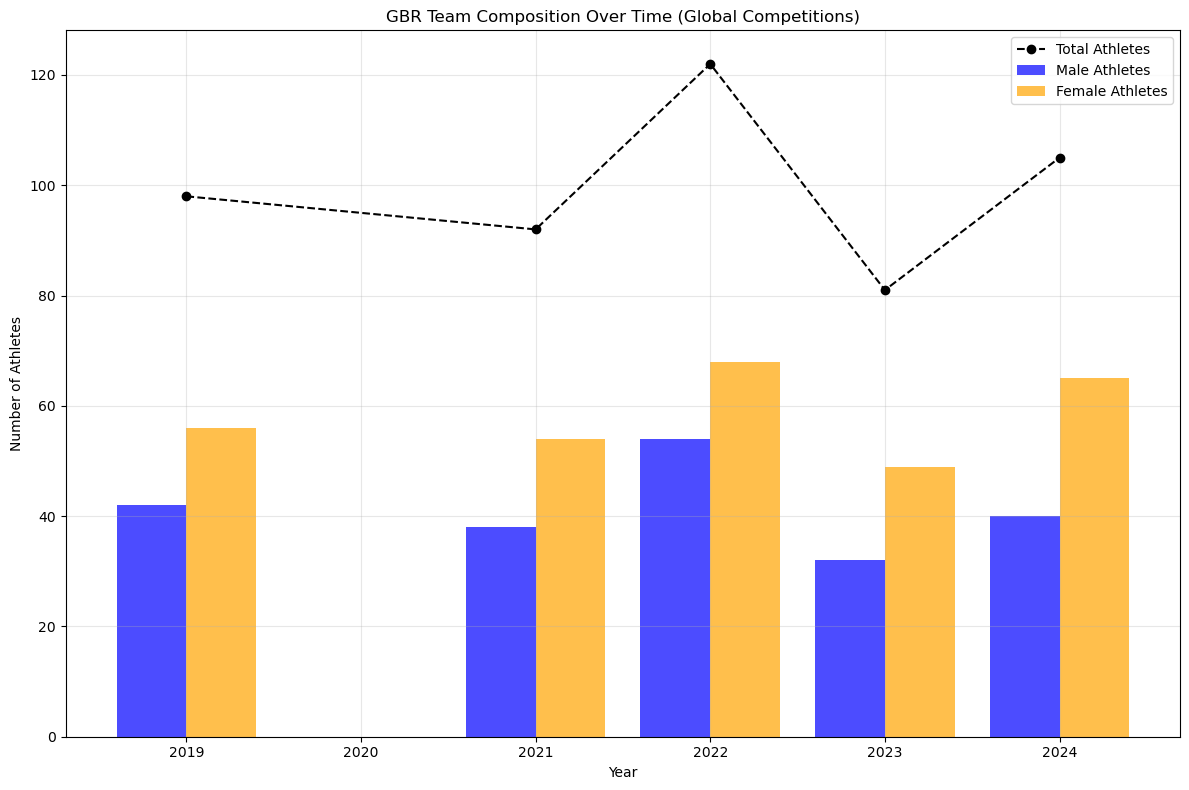

In [85]:
# Step 5: Plot Data (Side-by-Side Bars for Genders)
plt.figure(figsize=(12, 8))

# Define bar width and calculate offsets for side-by-side bars
bar_width = 0.4
years = pivot_data.index

# Plot male athletes
plt.bar(
    years - bar_width / 2,  # Offset to the left
    pivot_data.get('M', 0),
    width=bar_width,
    label='Male Athletes',
    color='blue',
    alpha=0.7
)

# Plot female athletes
plt.bar(
    years + bar_width / 2,  # Offset to the right
    pivot_data.get('W', 0),
    width=bar_width,
    label='Female Athletes',
    color='orange',
    alpha=0.7
)

# Line plot for total athletes
plt.plot(
    total_composition['Year'],
    total_composition['TotalAthletes'],
    color='black',
    linestyle='--',
    label='Total Athletes',
    marker='o'
)

# Add Titles and Labels
plt.title("GBR Team Composition Over Time (Global Competitions)")
plt.xlabel("Year")
plt.ylabel("Number of Athletes")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the plot
plt.show()

#### Explanation
	1.	Gender Distribution Over Time:
	•	The plot highlights the composition of GBR athletes (male and female) competing in global competitions from 2019 to 2024.
	•	Female athletes consistently outnumber male athletes across the years, indicating a stronger representation of women in global competitions for GBR.
	2.	Total Athlete Participation:
	•	The dashed line shows the overall trend in GBR athlete participation in global events. There is a visible dip in 2023, likely reflecting specific factors (e.g., competition schedules, athlete availability, or selection criteria).

# Step3: Analysis and Modelling

## 3.1 Performance Analysis

In [86]:
all_info.head(2)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag
0,1109804,76912,2407887,2019-07-28,Triple Jump,outdoor,13.05,metres,1.0,finals,innsbruck,angela barrett,W,gbr,gbr
1,1152467,76920,976491,2019-05-05,Discus Throw,outdoor,38.45,metres,7.0,finals,amherst ma,rachel forder,W,gbr,gbr


In [87]:
print(all_info['PerformanceValues'].dtype)
print(all_info['PerformanceValues'].head())
print(all_info['PerformanceValues'].isnull().sum())

float64
0     13.05
1     38.45
3    114.00
4     18.97
5     66.99
Name: PerformanceValues, dtype: float64
0


In [88]:
# Step 0: Filter for athletes in the final round only
all_info_finals = all_info[all_info['CompRound'] == 'finals'] # contains entries from all events and all positions including national/GBR and International/global in the Final round

# # Step 2: Filter Data for GBR and Global Athletes
# gbr_data = all_info_finals[all_info_finals['Flag'] == 'gbr'] # Athletes that only came from GBR/national events
# global_data = all_info_finals[all_info_finals['Flag'] == 'global'] # Athletes that only came from global events including GBR (on global level) and all other nationalities

# Step 1: Identify Event Type Based on PerformanceUnits
all_info_finals['EventType'] = all_info_finals['PerformanceUnits'].apply(lambda x: 'time_based' if x == 'seconds' else 'distance_based')

# Step 2: Filter Data for GBR and Global Athletes
gbr_data = all_info_finals[all_info_finals['Flag'] == 'gbr'] # Athletes that only came from GBR/national events
global_data = all_info_finals[all_info_finals['Flag'] == 'global'] # Athletes that only came from global events including GBR (on global level) and all other nationalities


/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/853611889.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_info_finals['EventType'] = all_info_finals['PerformanceUnits'].apply(lambda x: 'time_based' if x == 'seconds' else 'distance_based')


In [89]:
gbr_data = all_info_finals[all_info_finals['Flag'] == 'gbr'] # Athletes that only came from GBR/national events
global_data = all_info_finals[all_info_finals['Flag'] == 'global'] # Athletes that only came from global events including GBR (on global level) and all other nationalities


In [90]:
all_info_finals.head(2)

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag,EventType
0,1109804,76912,2407887,2019-07-28,Triple Jump,outdoor,13.05,metres,1.0,finals,innsbruck,angela barrett,W,gbr,gbr,distance_based
1,1152467,76920,976491,2019-05-05,Discus Throw,outdoor,38.45,metres,7.0,finals,amherst ma,rachel forder,W,gbr,gbr,distance_based


In [91]:
gbr_data

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag,EventType
0,1109804,76912,2407887,2019-07-28,Triple Jump,outdoor,13.05,metres,1.0,finals,innsbruck,angela barrett,W,gbr,gbr,distance_based
1,1152467,76920,976491,2019-05-05,Discus Throw,outdoor,38.45,metres,7.0,finals,amherst ma,rachel forder,W,gbr,gbr,distance_based
3,1140691,76923,2412369,2019-07-20,800m,outdoor,114.00,seconds,1.0,finals,tullamore,elliot slade,M,gbr,gbr,time_based
4,1266893,76923,973745,2019-07-13,100m,outdoor,18.97,seconds,8.0,finals,tullamore,jenna breen,W,gbr,gbr,time_based
5,1291263,76923,984143,2019-07-20,400m,outdoor,66.99,seconds,7.0,finals,tullamore,caitlyn harvey,W,gbr,gbr,time_based
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96234,1176455,142548,3153754,2024-09-05,1500m,outdoor,211.46,seconds,5.0,finals,zrich,josh kerr,M,gbr,gbr,time_based
96235,1154953,142548,3153783,2024-09-05,800m,outdoor,118.49,seconds,4.0,finals,zrich,jemma reekie,W,gbr,gbr,time_based
96236,1111484,142548,3153783,2024-09-05,800m,outdoor,117.94,seconds,2.0,finals,zrich,georgia bell,W,gbr,gbr,time_based
96237,1146493,142548,3153784,2024-09-05,Shot Put,outdoor,20.82,metres,5.0,finals,zrich,scott lincoln,M,gbr,gbr,distance_based


In [92]:
# gbr_data.head()

In [93]:
# Step 3: Group Data by Event and Gender to Calculate Performance Statistics
gbr_stats = gbr_data.groupby(['EventName', 'AthleteGender'])['PerformanceValues'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
global_stats = global_data.groupby(['EventName', 'AthleteGender'])['PerformanceValues'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/1825600333.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gbr_stats = gbr_data.groupby(['EventName', 'AthleteGender'])['PerformanceValues'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/1825600333.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_stats = global_data.groupby(['EventName', 'AthleteGender'])['PerformanceValues'].agg(['mean', 'median', 'std', 'min', 'max']).reset_index()


In [94]:
# Step4: Helps identify events where GBR athletes perform competitively compared to the global field
# Merge GBR and Global statistics for comparison
performance_comparison = gbr_stats.merge(
    global_stats, 
    on=['EventName', 'AthleteGender'], 
    suffixes=('_gbr', '_global')
)

In [95]:
# performance_comparison.shape

In [96]:
# Step 5: Use PerformanceValues for Rankings (Ensure Gender-Specific)
# Filter athletes with positions 1, 2, and 3 for each group (EventName, AthleteGender and Flag (gbr and global each))
all_info_finals['RankValue'] = all_info_finals.apply(
    lambda row: row['PerformanceValues'] if row['EventType'] == 'time_based' else -row['PerformanceValues'],
    axis=1
)

top_3_performers = (
    all_info_finals.groupby(['EventName', 'AthleteGender', 'Flag'], group_keys=False)
    .apply(lambda x: x.nsmallest(3, 'RankValue'))  # Get top 3 based on RankValue
    .reset_index(drop=True)
)

# Verify the results
print(top_3_performers[['AthleteName', 'EventName', 'AthleteGender', 'CompPosition', 'PerformanceValues', 'Flag', 'RankValue']].head())

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2982242168.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_info_finals['RankValue'] = all_info_finals.apply(
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2982242168.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_info_finals.groupby(['EventName', 'AthleteGender', 'Flag'], group_keys=False)


        AthleteName EventName AthleteGender  CompPosition  PerformanceValues  \
0     patrick dever    10000m    M                   10.0            1628.81   
1        marc scott    10000m    M                    1.0            1630.41   
2     patrick dever    10000m    M                    6.0            1643.88   
3  joshua cheptegei    10000m    M                    1.0            1603.14   
4    berihu aregawi    10000m    M                    2.0            1603.44   

     Flag  RankValue  
0     gbr    1628.81  
1     gbr    1630.41  
2     gbr    1643.88  
3  global    1603.14  
4  global    1603.44  


/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2982242168.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.nsmallest(3, 'RankValue'))  # Get top 3 based on RankValue


#### Note: 
top_3_performers are based on RankValue and not on CompPosition or PerformanceValues. RankValue is created out of PerformanceValues and should be considered moving forward

In [97]:
# # Validate that top 3 positions are selected for each group
# print(top_3_performers.value_counts())

In [98]:
# # Verify
# print(top_3_performers['Flag'].value_counts())  # Should include both 'gbr' and 'global'

In [99]:
# top_3_performers.shape

The discrepancy above between the expected 228 rows and the actual 216 rows might stem from certain event-gender-flag combinations being entirely absent in the dataset.

In [100]:
# Step6: Filter only GBR athletes from the global top 3 performers
gbr_top_3_performers = top_3_performers[top_3_performers['Flag'] == 'gbr']

# Verify Results
print("GBR Top 3 Performers:")
print(gbr_top_3_performers[['AthleteName', 'EventName', 'AthleteGender', 'CompPosition', 'Flag']].head())

GBR Top 3 Performers:
       AthleteName EventName AthleteGender  CompPosition Flag
0    patrick dever    10000m    M                   10.0  gbr
1       marc scott    10000m    M                    1.0  gbr
2    patrick dever    10000m    M                    6.0  gbr
6  eilish mccolgan    10000m    W                    1.0  gbr
7  eilish mccolgan    10000m    W                    1.0  gbr


In [101]:
# Step 7: Group Top 3 Performers to Count GBR Athletes in the Top 3
# Count GBR athletes in the top 3 for each EventName and AthleteGender
gbr_top_3_count = (
    top_3_performers[top_3_performers['Flag'] == 'gbr']
    .groupby(['EventName', 'AthleteGender'])
    .size()
    .reset_index(name='GBR_Top3_Count')
)

print(gbr_top_3_count)

             EventName AthleteGender  GBR_Top3_Count
0               10000m    M                        3
1               10000m    W                        3
2                 100m    M                        3
3                 100m    W                        3
4         100m Hurdles    M                        0
5         100m Hurdles    W                        3
6         110m Hurdles    M                        3
7         110m Hurdles    W                        0
8                1500m    M                        3
9                1500m    W                        3
10                200m    M                        3
11                200m    W                        3
12  3000m Steeplechase    M                        3
13  3000m Steeplechase    W                        3
14                400m    M                        3
15                400m    W                        3
16        400m Hurdles    M                        3
17        400m Hurdles    W                   

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/4069735777.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(['EventName', 'AthleteGender'])


In [102]:
# Display Results
print("GBR Performance Statistics:\n", gbr_stats, "\n") # Provides insights into how GBR athletes perform in each event 
print("Global Performance Statistics:\n", global_stats, "\n") # Benchmarks GBR athletes’ performances against global competitors in each event
print("Performance Comparison:\n", performance_comparison, "\n") # Helps identify events where GBR athletes perform competitively compared to the global field
print("Top 3 Performers by Event:\n", top_3_performers[['AthleteGUID', 'AthleteName', 'AthleteGender', 'EventName', 'PerformanceValues', 'RankValue', 'CompPosition']], "\n") # The top 3 ranked athletes across all events, including both gbr and global athletes
print("GBR Top 3 Performers by Event:\n", gbr_top_3_performers[['AthleteGUID', 'AthleteName', 'EventName', 'PerformanceValues']], "\n") # GBR Top 3 performers within GBR/national contests
print("GBR Top 3:\n", gbr_top_3_count, "\n") # The count of GBR athletes who are ranked in the top 3 for each event (gbr_top_3_count)

GBR Performance Statistics:
              EventName AthleteGender         mean    median         std  \
0               10000m    M           1793.909177  1806.550   69.159967   
1               10000m    W           2062.157180  2061.000  114.903175   
2                 100m    M             10.774423    10.840    0.251499   
3                 100m    W             11.930970    12.010    0.381076   
4         100m Hurdles    M                   NaN       NaN         NaN   
5         100m Hurdles    W             13.912018    13.920    0.571259   
6         110m Hurdles    M             14.077203    14.060    0.461652   
7         110m Hurdles    W                   NaN       NaN         NaN   
8                1500m    M            230.922263   232.295    6.709858   
9                1500m    W            267.533404   269.610   10.392703   
10                200m    M             21.637231    21.730    0.475181   
11                200m    W             24.233415    24.385    0.880724

In [103]:
# # Check
# # Verifying. Filter the top 3 performers for the 10000m event
# top_3_10000m = (
#     top_3_performers[top_3_performers['EventName'] == '10000m']
#     .groupby('AthleteGender', group_keys=False)  # Group by gender
#     .apply(lambda x: x.nsmallest(3, 'RankValue'))  # Ensure top 3 per gender
# )

# # Display the results
# print(top_3_10000m[['AthleteName', 'EventName', 'AthleteGender', 'RankValue', 'PerformanceValues', 'Flag']])

In [104]:
# gbr_top_3_count

In [105]:
# # Checking if the distance_based is giving correct order of top 3
# # Apply the corrected filter
# men_pole_vault = all_info_finals[
#     (all_info_finals['EventName'] == 'Pole Vault') & 
#     (all_info_finals['AthleteGender'].str.strip().str.lower() == 'm')  # Standardized check for 'M'
# ]

# # Sort by RankValue to ensure the order is correct
# top_3_men_pole_vault = (
#     men_pole_vault
#     .nsmallest(3, 'RankValue')  # Get the top 3 based on RankValue
#     .sort_values('RankValue')  # Ensure sorted order
# )

# # Display the top 3 results
# print(top_3_men_pole_vault[['AthleteName', 'EventName', 'AthleteGender', 'RankValue', 'PerformanceValues', 'Flag']])

# # Hence, correct

### Saving Outputs

In [106]:
# Save outputs as CSVs for reuse in later steps
all_info_finals.to_csv(processed_dir + "all_info_finals.csv", index=False)
gbr_stats.to_csv(processed_dir + "GBR_Performance_Statistics.csv", index=False)
global_stats.to_csv(processed_dir + "Global_Performance_Statistics.csv", index=False)
performance_comparison.to_csv(processed_dir + "Performance_Comparison.csv", index=False)
top_3_performers.to_csv(processed_dir + "Top_3_Performers.csv", index=False) 
gbr_top_3_performers.to_csv(processed_dir + "GBR_Top_3_Performers.csv", index=False)
gbr_top_3_count.to_csv(processed_dir + "GBR_Top_3_Count.csv", index=False)

### Importance of Values Calculated:
1.	gbr_stats:

	•	Provides summary statistics (mean, median, min, max) for GBR athletes in each event.

	•	Helps us understand how GBR athletes have been performing historically and their range of performances.

2.	global_stats:

	•	Provides the same summary statistics for global athletes.

	•	Gives insights into global performance levels, which are critical for defining medal thresholds.

3.	performance_comparison:

	•	Combines gbr_stats and global_stats into a single dataset for side-by-side comparison of GBR vs. global performances.

	•	Helps identify events where GBR athletes are competitive relative to global athletes.

4.	top_3_performers:

	•	Lists the top 3 performers across all events, including GBR and global athletes.

	•	Used to rank athletes and identify trends for medal-level performance.

5.	gbr_top_3_count:

	•	Counts how many GBR athletes are ranked in the top 3 for each event.
		
		It only counts GBR athletes already in the top 3.
	
	•	Useful for identifying GBR’s historical competitiveness in specific events.
6. gbr_top_3
	Counts the top 3 performers for GBR group by an event, gender wise globally 

## 3.2 Medal Prediction
The objective here is to predict how many medals GBR athletes are likely to win and in which events, based on thresholds derived from global competitors’ performances.

The goal is to identify:
	1.	Which GBR athletes are strong contenders for medals in each event.
	2.	Use recent global performances to define thresholds for medal contention.
	3.	Compare GBR athletes’ performances to global benchmarks to determine their likelihood of medaling.

This step will:
	•	Analyze performance trends globally to set realistic thresholds for medal positions.
	•	Highlight GBR athletes who meet or exceed these thresholds.

### Objective: 
	1.	Identify thresholds that represent the 3rd place performance globally for each event, i.e., the minimum performance level required to win a medal.
	2.	Compare GBR athletes’ performances against these thresholds to determine which GBR athletes are likely to win a medal.

### Plan:
1.	Define Medal Thresholds:
•	Use the top_3_performers to calculate thresholds for medal contention:

•	For time-based events: The third-lowest performance value is the threshold (e.g., the slowest among the top 3).

•	For distance-based events: The third-highest performance value is the threshold.

2.	Merge Thresholds:
•	Append these thresholds to the all_info_finals dataset for comparison.

3.	Identify GBR Medal Contenders:
•	For time-based events, filter GBR athletes with PerformanceValues <= MedalThreshold.
•	For distance-based events, filter GBR athletes with PerformanceValues >= MedalThreshold.

4.	Combine Results:
•	Create a single DataFrame of GBR medal contenders.

5.	Output:
•	Format and display the medal contenders by event.

In [107]:
# top_3_performers

In [108]:
# gbr_medal_contenders.columns

In [109]:
# Step 1: Define Medal Contention Thresholds Using top_3_performers (with Gender)
def calculate_threshold(group):
    event_type = group['EventType'].iloc[0]  # Identify the event type
    if event_type == 'time_based':
        return group['PerformanceValues'].nsmallest(3).max()  # Third-lowest for time-based
    elif event_type == 'distance_based':
        return group['PerformanceValues'].nlargest(3).min()  # Third-highest for distance-based

# Apply threshold calculation grouped by EventName and AthleteGender
medal_thresholds = (
    top_3_performers.groupby(['EventName', 'AthleteGender'])
    .apply(calculate_threshold)
    .reset_index(name='MedalThreshold')
)

# Debugging: Verify thresholds with gender
print("Medal Thresholds (With Gender):\n", medal_thresholds.head())

Medal Thresholds (With Gender):
       EventName AthleteGender  MedalThreshold
0        10000m    M                  1603.46
1        10000m    W                  1800.86
2          100m    M                     9.79
3          100m    W                    10.67
4  100m Hurdles    W                    12.23


/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/3648947553.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_3_performers.groupby(['EventName', 'AthleteGender'])
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/3648947553.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(calculate_threshold)


In [110]:
# medal_thresholds

In [111]:
medal_thresholds.to_csv(processed_dir + "Medal_Thresholds.csv")
print("Medal Thresholds Saved")

Medal Thresholds Saved


In [112]:
# Step 2: Merge thresholds back to all_info_finals
all_info_finals = all_info_finals.merge(
    medal_thresholds, 
    on=['EventName', 'AthleteGender'], 
    how='left'
)

# Debugging: Verify merge success
if 'MedalThreshold' not in all_info_finals.columns:
    print("Merge failed. Check column names or grouping logic.")
else: 
    print(all_info_finals.head())

   AthleteGUID  CompetitionID  EventID     dateid     EventName  Terrain  \
0      1109804          76912  2407887 2019-07-28   Triple Jump  outdoor   
1      1152467          76920   976491 2019-05-05  Discus Throw  outdoor   
2      1140691          76923  2412369 2019-07-20          800m  outdoor   
3      1266893          76923   973745 2019-07-13          100m  outdoor   
4      1291263          76923   984143 2019-07-20          400m  outdoor   

   PerformanceValues PerformanceUnits  CompPosition CompRound   CompVenue  \
0              13.05           metres           1.0    finals   innsbruck   
1              38.45           metres           7.0    finals  amherst ma   
2             114.00          seconds           1.0    finals   tullamore   
3              18.97          seconds           8.0    finals   tullamore   
4              66.99          seconds           7.0    finals   tullamore   

      AthleteName AthleteGender Nationality Flag       EventType  RankValue  \
0

In [113]:
# Step 3: Identify GBR Athletes Meeting Medal Thresholds (Including Global Athletes with Nationality == 'gbr')

# Time-based events
gbr_medal_contenders_time = all_info_finals[
    (all_info_finals['Nationality'] == 'gbr') &  # Include all British athletes
    (all_info_finals['EventType'] == 'time_based') &
    (all_info_finals['PerformanceValues'] <= all_info_finals['MedalThreshold'])
]

gbr_medal_contenders_time

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag,EventType,RankValue,MedalThreshold
11547,1313989,89486,2719303,2021-09-04,800m,outdoor,108.99,seconds,1.0,finals,tokyo,hannah cockroft,W,gbr,gbr,time_based,108.99,115.19
37002,1094126,129374,2887055,2023-03-04,10000m,outdoor,1800.86,seconds,1.0,finals,san juan capistrano ca,eilish mccolgan,W,gbr,gbr,time_based,1800.86,1800.86
42642,1221587,134552,2992541,2023-09-17,800m,outdoor,115.19,seconds,2.0,finals,eugene or,keely hodgkinson,W,gbr,gbr,time_based,115.19,115.19
43238,1221587,134890,3143060,2024-07-20,800m,outdoor,114.61,seconds,1.0,finals,london,keely hodgkinson,W,gbr,gbr,time_based,114.61,115.19
48178,1153204,137298,3101752,2024-05-17,5000m,outdoor,774.66,seconds,8.0,finals,westwood ca,sam atkin,M,gbr,gbr,time_based,774.66,778.61
53443,1176455,142291,3147955,2024-08-06,1500m,outdoor,207.79,seconds,2.0,finals,paris,josh kerr,M,gbr,gbr,time_based,207.79,207.79
53449,1150443,142291,3148209,2024-08-07,400m,outdoor,43.44,seconds,2.0,finals,paris,matthew hudsonsmith,M,gbr,gbr,time_based,43.44,43.44
54363,1176455,142291,3147955,2024-08-06,1500m,outdoor,207.79,seconds,2.0,finals,paris,josh kerr,M,gbr,global,time_based,207.79,207.79
54854,1150443,142291,3148209,2024-08-07,400m,outdoor,43.44,seconds,2.0,finals,paris,matthew hudsonsmith,M,gbr,global,time_based,43.44,43.44


In [114]:
# Step3b: Distance-based events
gbr_medal_contenders_distance = all_info_finals[
    (all_info_finals['Nationality'] == 'gbr') &  # Include all British athletes
    (all_info_finals['EventType'] == 'distance_based') &
    (all_info_finals['PerformanceValues'] >= all_info_finals['MedalThreshold'])
]

gbr_medal_contenders_distance.tail()

,AthleteGUID,CompetitionID,EventID,dateid,EventName,Terrain,PerformanceValues,PerformanceUnits,CompPosition,CompRound,CompVenue,AthleteName,AthleteGender,Nationality,Flag,EventType,RankValue,MedalThreshold
20190,1123895,112051,2646135,2021-06-26,Pole Vault,outdoor,4.90,metres,1.0,finals,manchester,holly bradshaw,W,gbr,gbr,distance_based,-4.90,4.9
46123,1184793,135708,3128652,2024-06-22,Pole Vault,outdoor,4.92,metres,1.0,finals,toulouse,molly caudery,W,gbr,gbr,distance_based,-4.92,4.9


In [115]:
# Step 4: Combine Results
gbr_medal_contenders = pd.concat([gbr_medal_contenders_time, gbr_medal_contenders_distance])

# Sort by Flag to prioritize 'global' over 'gbr' also to remove duplicated values
gbr_medal_contenders = gbr_medal_contenders.sort_values(
    by=['Flag'], ascending=False  # 'global' comes before 'gbr'
)

# Remove duplicates based on AthleteGUID, EventName, and AthleteGender
gbr_medal_contenders = gbr_medal_contenders.drop_duplicates(
    subset=['AthleteGUID', 'EventName', 'AthleteGender'], keep='first'
)

# Format results
gbr_medal_contenders = gbr_medal_contenders[
    ['AthleteGUID', 'AthleteName', 'EventName', 'AthleteGender', 'PerformanceValues', 'MedalThreshold', 'CompPosition', 'Nationality', 'Flag']
]
gbr_medal_contenders.sort_values(by=['EventName', 'AthleteGender', 'PerformanceValues'], inplace=True)

# Display Medal Contenders
print("GBR Medal Contenders (Including Global British Athletes):\n", gbr_medal_contenders)

GBR Medal Contenders (Including Global British Athletes):
        AthleteGUID          AthleteName   EventName AthleteGender  \
37002      1094126      eilish mccolgan      10000m    W            
54363      1176455            josh kerr       1500m    M            
54854      1150443  matthew hudsonsmith        400m    M            
48178      1153204            sam atkin       5000m    M            
11547      1313989      hannah cockroft        800m    W            
42642      1221587     keely hodgkinson        800m    W            
20190      1123895       holly bradshaw  Pole Vault    W            
46123      1184793        molly caudery  Pole Vault    W            

       PerformanceValues  MedalThreshold  CompPosition Nationality    Flag  
37002            1800.86         1800.86           1.0         gbr     gbr  
54363             207.79          207.79           2.0         gbr  global  
54854              43.44           43.44           2.0         gbr  global  
48178      

### 3.2.1 Checking if Contender represents GBR globally

Running checks to see if the contender is already representing Great Britian globally regardless of their performance that met the benchmark which could be misleading.

In [116]:
# # Step 1: Identify GBR Athletes Representing Globally from global_data
# global_representations = global_data[
#     global_data['Nationality'] == 'gbr'  # GBR athletes competing globally
# ][['AthleteGUID', 'EventName', 'AthleteGender']].drop_duplicates()

# # Step 2: Update Flag Locally in gbr_medal_contenders
# gbr_medal_contenders['Flag'] = gbr_medal_contenders.apply(
#     lambda row: 'global' if (
#         row['Flag'] == 'gbr' and  # Currently flagged as 'gbr'
#         global_representations[
#             (global_representations['AthleteGUID'] == row['AthleteGUID']) &  # Same athlete
#             (global_representations['EventName'] == row['EventName']) &  # Same event
#             (global_representations['AthleteGender'] == row['AthleteGender'])  # Same gender
#         ].shape[0] > 0  # Exists in global representation
#     ) else row['Flag'], 
#     axis=1
# )

# # Debugging: Verify Updates in gbr_medal_contenders
# print("Updated Flags in Medal Contenders:\n", gbr_medal_contenders[['AthleteGUID', 'EventName', 'AthleteGender', 'Flag']])

The checks above show only 2 Athletes haven't represented Great Britian globally in the event they are likely to win a medal. Domestic talent that could win a global medal. 

### Saving the Output for Predictions

In [117]:
# Extract number of predicted medals event wise
event_wise_medal_counts = gbr_medal_contenders.groupby('EventName').size().reset_index(name='PredictedMedalCount')

events_with_predicted_medals = event_wise_medal_counts[event_wise_medal_counts['PredictedMedalCount'] > 0]

# Display the result
print(events_with_predicted_medals)

     EventName  PredictedMedalCount
0       10000m                    1
4        1500m                    1
7         400m                    1
9        5000m                    1
10        800m                    2
16  Pole Vault                    2


/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2882843379.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  event_wise_medal_counts = gbr_medal_contenders.groupby('EventName').size().reset_index(name='PredictedMedalCount')


In [118]:
# Save to CSV
gbr_medal_contenders.to_csv(processed_dir + "GBR_Medal_Contenders.csv", index=False)

# Step 5: Summarize Results
medal_summary = gbr_medal_contenders.groupby(['EventName', 'AthleteGender']).size().reset_index(name='GBR_Medal_Contenders_Count')

# Display Summary
print("GBR Medal Contenders Summary:\n", medal_summary)

# Save Summary
medal_summary.to_csv(processed_dir + "GBR_Medal_Contenders_Summary.csv", index=False)

events_with_predicted_medals.to_csv(processed_dir + "Events_With_Predicted_Medals.csv", index=False)

GBR Medal Contenders Summary:
              EventName AthleteGender  GBR_Medal_Contenders_Count
0               10000m    M                                    0
1               10000m    W                                    1
2                 100m    M                                    0
3                 100m    W                                    0
4         100m Hurdles    M                                    0
5         100m Hurdles    W                                    0
6         110m Hurdles    M                                    0
7         110m Hurdles    W                                    0
8                1500m    M                                    1
9                1500m    W                                    0
10                200m    M                                    0
11                200m    W                                    0
12  3000m Steeplechase    M                                    0
13  3000m Steeplechase    W                                

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/1933401316.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_summary = gbr_medal_contenders.groupby(['EventName', 'AthleteGender']).size().reset_index(name='GBR_Medal_Contenders_Count')


In [119]:
gbr_medal_contenders

,AthleteGUID,AthleteName,EventName,AthleteGender,PerformanceValues,MedalThreshold,CompPosition,Nationality,Flag
37002,1094126,eilish mccolgan,10000m,W,1800.86,1800.86,1.0,gbr,gbr
54363,1176455,josh kerr,1500m,M,207.79,207.79,2.0,gbr,global
54854,1150443,matthew hudsonsmith,400m,M,43.44,43.44,2.0,gbr,global
48178,1153204,sam atkin,5000m,M,774.66,778.61,8.0,gbr,gbr
11547,1313989,hannah cockroft,800m,W,108.99,115.19,1.0,gbr,gbr
42642,1221587,keely hodgkinson,800m,W,115.19,115.19,2.0,gbr,gbr
20190,1123895,holly bradshaw,Pole Vault,W,4.90,4.90,1.0,gbr,gbr
46123,1184793,molly caudery,Pole Vault,W,4.92,4.90,1.0,gbr,gbr


In [120]:
# # Step 1: Sort to Prioritize Global over GBR
# gbr_medal_contenders = gbr_medal_contenders.sort_values(
#     by=['Flag'], ascending=False  # 'global' comes before 'gbr'
# )

# # Step 2: Remove Duplicates by AthleteGUID, EventName, and AthleteGender
# gbr_medal_contenders = gbr_medal_contenders.drop_duplicates(
#     subset=['AthleteGUID', 'EventName', 'AthleteGender'], keep='first'
# )

# # Step 3: Display Final Results
# gbr_medal_contenders

# # Save Final Results
# gbr_medal_contenders.to_csv(processed_dir + "GBR_Medal_Contenders_Final.csv", index=False)

In [121]:
# # Step 1: Define Medal Contention Thresholds Using top_3_performers
# def calculate_threshold(group):
#     event_type = group['EventType'].iloc[0]  # Identify the event type
#     if event_type == 'time_based':
#         return group['PerformanceValues'].nsmallest(3).max()  # Third-lowest for time-based
#     elif event_type == 'distance_based':
#         return group['PerformanceValues'].nlargest(3).min()  # Third-highest for distance-based

# # Apply threshold calculation for each event using top_3_performers
# medal_thresholds = (
#     top_3_performers.groupby('EventName').apply(calculate_threshold).reset_index(name='MedalThreshold')
# )

# # Step 2: Merge thresholds back to all_info_finals
# all_info_finals = all_info_finals.merge(medal_thresholds, on='EventName', how='left')

# # Step 3: Identify GBR Athletes Meeting Thresholds
# # Time-based events
# gbr_medal_contenders_time = all_info_finals[
#     (all_info_finals['Flag'] == 'gbr') &
#     (all_info_finals['EventType'] == 'time_based') &
#     (all_info_finals['PerformanceValues'] <= all_info_finals['MedalThreshold'])
# ]

# # Distance-based events
# gbr_medal_contenders_distance = all_info_finals[
#     (all_info_finals['Flag'] == 'gbr') &
#     (all_info_finals['EventType'] == 'distance_based') &
#     (all_info_finals['PerformanceValues'] >= all_info_finals['MedalThreshold'])
# ]

# # Combine results
# gbr_medal_contenders = pd.concat([gbr_medal_contenders_time, gbr_medal_contenders_distance])

# # Step 4: Format Output
# gbr_medal_contenders = gbr_medal_contenders[['AthleteGUID', 'AthleteName', 'EventName', 'PerformanceValues', 'MedalThreshold']]
# gbr_medal_contenders.sort_values(by=['EventName', 'PerformanceValues'], inplace=True)

# # Display Results
# print("GBR Medal Contenders:\n", gbr_medal_contenders)

# # Save Results
# gbr_medal_contenders.to_csv(processed_dir + "GBR_Medal_Contenders_Prediction.csv", index=False)

In [122]:
# print(medal_thresholds.head())  # Inspect the first few rows
# print(medal_thresholds.columns)  # Check column names

## 3.3 Trend Analysis

In [123]:
# gbr_trends

In [124]:
# Step 1: Filter Data for 2019 Onwards
all_info_finals['year'] = pd.to_datetime(all_info_finals['dateid']).dt.year  # Extract year from dateid
performance_data = all_info_finals[all_info_finals['year'] >= 2019]  # Filter data for 2019 onwards

In [125]:
# # Step 5: Identify Key Insights
# # Highlight events where GBR performance is improving or declining
# improvement_decline = trend_comparison.groupby(['EventName', 'AthleteGender']).apply(
#     lambda x: 'Improving' if x['GBR_MeanPerformance'].iloc[-1] < x['GBR_MeanPerformance'].iloc[0] else 'Declining'
# ).reset_index(name='Trend')

# # Sort by Trend (Improving first, Declining after that) and EventName for clarity
# improvement_decline_sorted = improvement_decline.sort_values(
#     by=['Trend'], ascending=[False]
# )

# # Display Key Insights
# print("Performance Trends of GBR Athletes by Event and Gender:\n", improvement_decline_sorted)

In [126]:
# # Step 5: Identify Key Insights
# # Ensure data is sorted by year within each EventName and AthleteGender group
# trend_comparison = trend_comparison.sort_values(by=['EventName', 'AthleteGender', 'year'])

# # Highlight events where GBR performance is improving or declining
# def determine_trend(group):
#     # Compare the earliest (first year) and latest (last year) GBR performances
#     first_performance = group['GBR_MeanPerformance'].iloc[0]
#     last_performance = group['GBR_MeanPerformance'].iloc[-1]
#     return 'Improving' if last_performance < first_performance else 'Declining'

# # Apply the trend determination function
# improvement_decline = trend_comparison.groupby(['EventName', 'AthleteGender']).apply(determine_trend).reset_index(name='Trend')

# # Sort by Trend (Improving first, Declining after that) and EventName for clarity
# improvement_decline_sorted = improvement_decline.sort_values(by=['Trend', 'EventName'], ascending=[True, True])

# # Display Key Insights
# print("Performance Trends of GBR Athletes by Event and Gender:\n", improvement_decline_sorted)

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2085105023.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gbr_data.groupby(['year', 'AthleteGender'])['PerformanceValues']
/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2085105023.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_data.groupby(['year', 'AthleteGender'])['PerformanceValues']


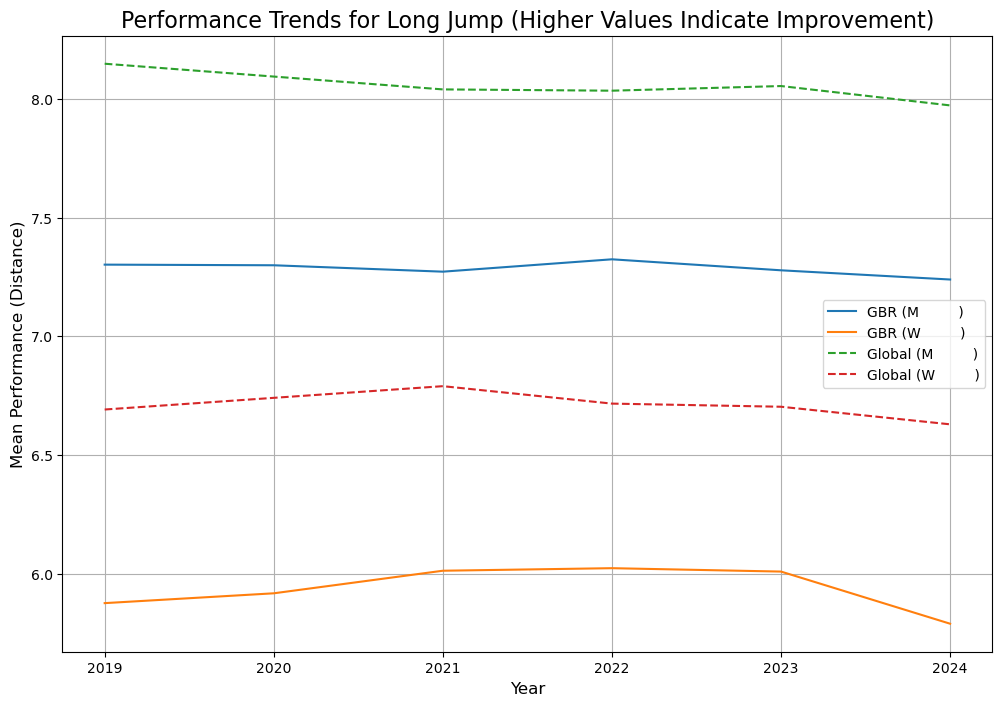

In [127]:
# Filter data for a distance-based event (e.g., "Long Jump")
event_name = "Long Jump"  # Replace with any distance-based event
event_data = performance_data[performance_data['EventName'] == event_name]

# Separate GBR and Global data
gbr_data = event_data[event_data['Nationality'] == 'gbr']
global_data = event_data[event_data['Flag'] == 'global']

# Calculate yearly mean performance for GBR and Global by gender
gbr_trends_event = (
    gbr_data.groupby(['year', 'AthleteGender'])['PerformanceValues']
    .mean()
    .reset_index()
    .rename(columns={'PerformanceValues': 'MeanPerformance'})
)

global_trends_event = (
    global_data.groupby(['year', 'AthleteGender'])['PerformanceValues']
    .mean()
    .reset_index()
    .rename(columns={'PerformanceValues': 'MeanPerformance'})
)

# Plot the trends
plt.figure(figsize=(12, 8))

# Plot GBR trends by gender
for gender in gbr_trends_event['AthleteGender'].unique():
    gender_data = gbr_trends_event[gbr_trends_event['AthleteGender'] == gender]
    plt.plot(
        gender_data['year'], 
        gender_data['MeanPerformance'], 
        label=f"GBR ({gender})"
    )

# Plot Global trends by gender (excluding GBR)
for gender in global_trends_event['AthleteGender'].unique():
    gender_data = global_trends_event[global_trends_event['AthleteGender'] == gender]
    plt.plot(
        gender_data['year'], 
        gender_data['MeanPerformance'], 
        linestyle='--', 
        label=f"Global ({gender})"
    )

# Add plot title, labels, and legend
plt.title(f"Performance Trends for {event_name} (Higher Values Indicate Improvement)", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Mean Performance (Distance)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

#### Explanation
The performance trends for Long Jump highlight a clear area of improvement for GBR athletes. While global male (M) and female (W) athletes consistently outperform GBR athletes, the GBR women’s trend shows a noticeable decline in performance from 2023 to 2024. Additionally, the GBR men’s performance has stagnated, staying well below the global average. Focusing on targeted training and performance enhancement could help GBR bridge this gap and compete more effectively on the global stage.

## 3.4 Event-Level Prediction

In [128]:
# Step 1: Aggregate GBR Medal Contenders by Event and Gender
medal_contenders_summary = gbr_medal_contenders.groupby(['EventName', 'AthleteGender']).size().reset_index(name='GBR_Contenders')

# Step 2: Calculate Medal Likelihood
# Assuming 3 global medal spots (top 3 athletes) per event/gender
medal_contenders_summary['MedalLikelihood (%)'] = (medal_contenders_summary['GBR_Contenders'] / 3) * 100

# Step 3: Rank Events by Medal Likelihood
medal_contenders_summary = medal_contenders_summary.sort_values(by='MedalLikelihood (%)', ascending=False)

# Step 4: Display and Save Results
print("Event-Level Medal Predictions:\n", medal_contenders_summary)

# Save Final Event-Level Predictions
medal_contenders_summary.to_csv(processed_dir + "GBR_Event_Level_Predictions.csv", index=False)

Event-Level Medal Predictions:
              EventName AthleteGender  GBR_Contenders  MedalLikelihood (%)
33          Pole Vault    W                        2            66.666667
21                800m    W                        2            66.666667
1               10000m    W                        1            33.333333
18               5000m    M                        1            33.333333
8                1500m    M                        1            33.333333
14                400m    M                        1            33.333333
0               10000m    M                        0             0.000000
27           High Jump    W                        0             0.000000
23        Discus Throw    W                        0             0.000000
24        Hammer Throw    M                        0             0.000000
25        Hammer Throw    W                        0             0.000000
26           High Jump    M                        0             0.000000
29    

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2951272689.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  medal_contenders_summary = gbr_medal_contenders.groupby(['EventName', 'AthleteGender']).size().reset_index(name='GBR_Contenders')


# Step 4: Data Visualisation

## Bar Chart: Medal Predictions/Contenders by Event

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/1655975699.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gbr_medal_contenders.groupby(['EventName', 'AthleteGender'])


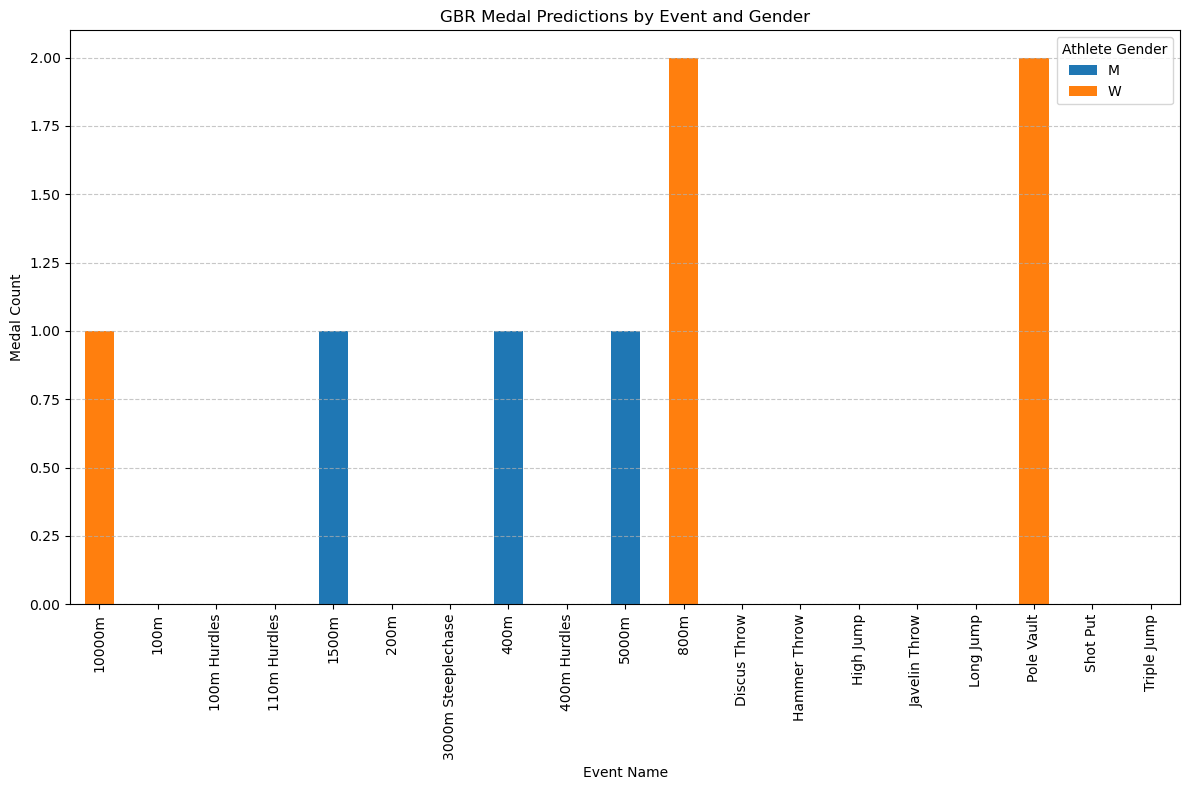

In [129]:
# Step 1: Bar Chart - Medal Predictions by Event
medal_summary_pivot = (
    gbr_medal_contenders.groupby(['EventName', 'AthleteGender'])
    .size()
    .reset_index(name='MedalCount')
    .pivot(index='EventName', columns='AthleteGender', values='MedalCount')
    .fillna(0)
)

# Step 2: Plot Stacked Bar Chart
medal_summary_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

plt.title('GBR Medal Predictions by Event and Gender')
plt.xlabel('Event Name')
plt.ylabel('Medal Count')
plt.legend(title='Athlete Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## 4.2 Performance Comparison Across Events

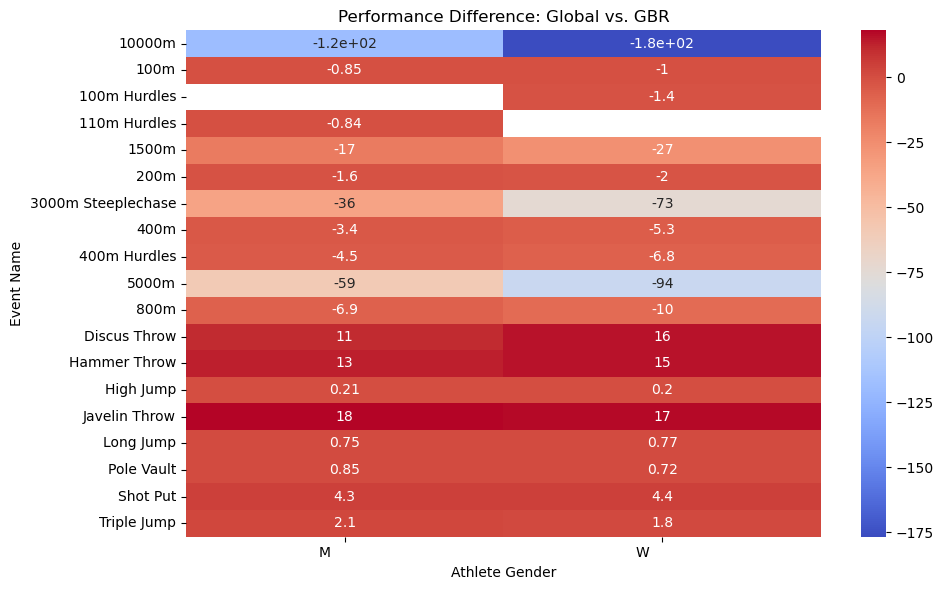

In [130]:
# Step 1: Calculate Performance Difference
performance_comparison['Performance_Difference'] = (
    performance_comparison['mean_global'] - performance_comparison['mean_gbr']
)

# Step 2: Pivot Data for Heatmap
performance_diff_pivot = performance_comparison.pivot(
    index='EventName', columns='AthleteGender', values='Performance_Difference'
)

# Step 3: Plot Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(performance_diff_pivot, annot=True, cmap='coolwarm', cbar=True)

plt.title('Performance Difference: Global vs. GBR')
plt.xlabel('Athlete Gender')
plt.ylabel('Event Name')
plt.tight_layout()
plt.show()

## 4.3 Top 3 Performers Summary

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/864259685.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_top_3_gbr.groupby(['EventName', 'AthleteGender'])


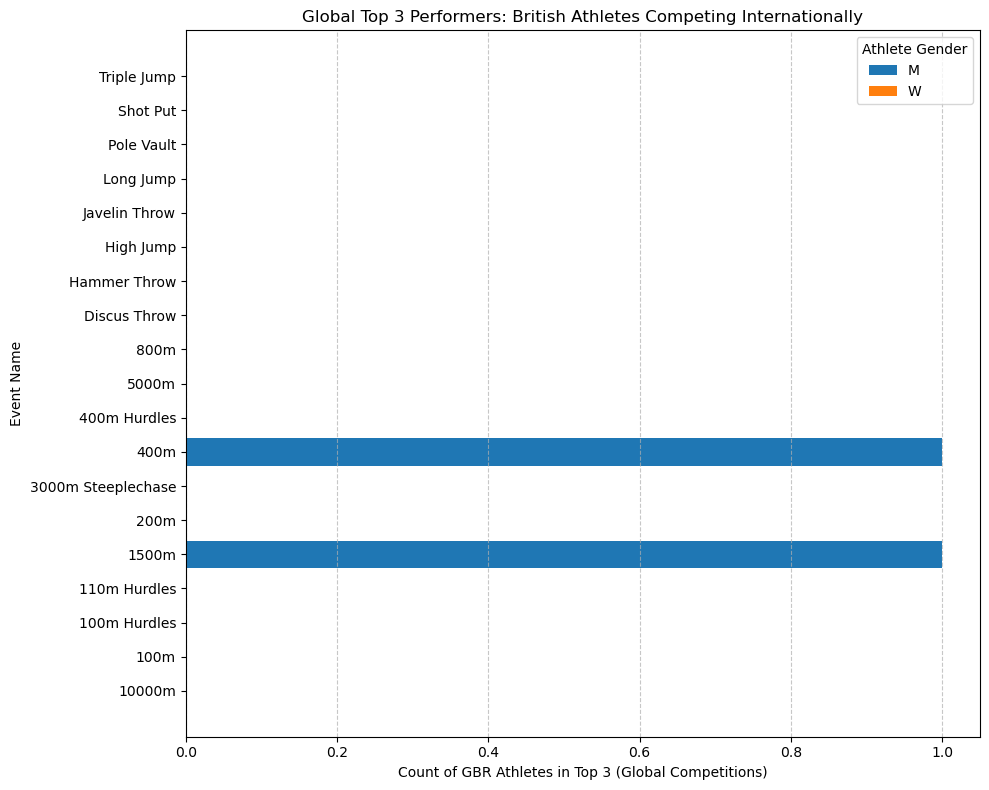

In [131]:
# Step 1: Filter GBR athletes in the global top 3 performers
global_top_3_gbr = gbr_medal_contenders[gbr_medal_contenders['Flag'] == 'global']
global_top_3_gbr

# Step 2: Count GBR athletes in the top 3 by EventName and AthleteGender
global_top_3_count = (
    global_top_3_gbr.groupby(['EventName', 'AthleteGender'])
    .size()
    .reset_index(name='Global_Top3_Count')
)

# Step 3: Plot Horizontal Bar Chart
plt.figure(figsize=(10, 8))
for gender in global_top_3_count['AthleteGender'].unique():
    gender_data = global_top_3_count[global_top_3_count['AthleteGender'] == gender]
    plt.barh(gender_data['EventName'], gender_data['Global_Top3_Count'], label=f"{gender}")

plt.title('Global Top 3 Performers: British Athletes Competing Internationally')
plt.xlabel('Count of GBR Athletes in Top 3 (Global Competitions)')
plt.ylabel('Event Name')
plt.legend(title='Athlete Gender')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/1842035346.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  global_top_3_gbr.groupby(['EventName', 'AthleteGender'])


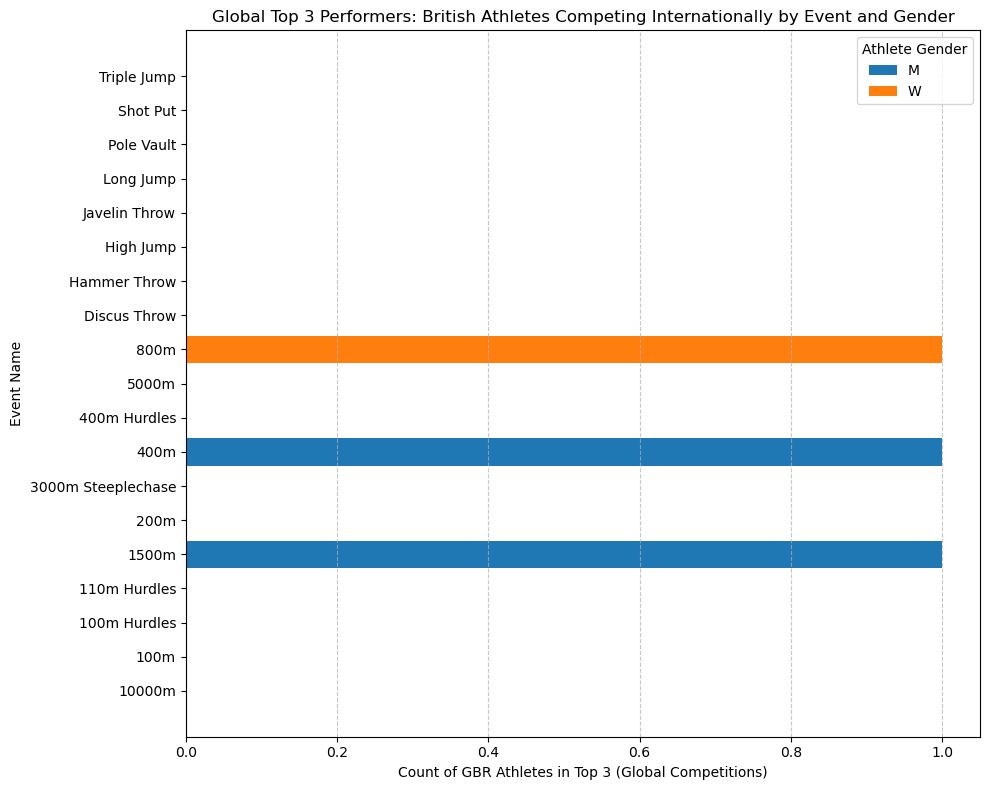

In [132]:
# Step 1: Filter GBR athletes in the global top 3 performers
global_top_3_gbr = top_3_performers[
    (top_3_performers['Flag'] == 'global') &  # Performances at global competitions
    (top_3_performers['Nationality'] == 'gbr')  # GBR athletes only
]

# Step 2: Count GBR athletes in the top 3 by EventName and AthleteGender
global_top_3_count = (
    global_top_3_gbr.groupby(['EventName', 'AthleteGender'])
    .size()
    .reset_index(name='Global_Top3_Count')
)

# Step 3: Plot Horizontal Bar Chart
plt.figure(figsize=(10, 8))
for gender in global_top_3_count['AthleteGender'].unique():
    gender_data = global_top_3_count[global_top_3_count['AthleteGender'] == gender]
    plt.barh(gender_data['EventName'], gender_data['Global_Top3_Count'], label=f"{gender}")

plt.title('Global Top 3 Performers: British Athletes Competing Internationally by Event and Gender')
plt.xlabel('Count of GBR Athletes in Top 3 (Global Competitions)')
plt.ylabel('Event Name')
plt.legend(title='Athlete Gender')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [133]:
# Step 1: Filter GBR athletes in the global top 3 performers
global_top_3_gbr = gbr_medal_contenders[
    (gbr_medal_contenders['Flag'] == 'global') &  # Performances at global competitions
    (gbr_medal_contenders['Nationality'] == 'gbr')  # GBR athletes only
]

# Step 2: Prepare data for the interactive plot
# Group by EventName and AthleteGender, combining athlete names
plot_data = global_top_3_gbr.groupby(['EventName', 'AthleteGender'])['AthleteName'].apply(
    lambda x: ', '.join(x.dropna().astype(str))  # Drop NaNs and ensure values are strings
).reset_index(name='AthleteNames')

# Step 3: Add a count column for the number of GBR athletes
plot_data['AthleteCount'] = plot_data['AthleteNames'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

# Step 4: Create the interactive horizontal bar chart
fig = px.bar(
    plot_data,
    x='AthleteCount',  # Number of GBR athletes in global top 3
    y='EventName',     # Event name
    color='AthleteGender',  # Gender as color differentiation
    text='AthleteNames',    # Show athlete names on hover
    title='Global Top 3 Performers: British Athletes Competing Internationally',
    orientation='h'         # Horizontal bar chart
)

# Update layout and formatting
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Count of GBR Athletes in Top 3 (Global Competitions)',
    yaxis_title='Event Name',
    legend_title='Athlete Gender',
    height=800,
    template='plotly_white'
)

# Display the interactive plot
fig.show()

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/987020292.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  plot_data = global_top_3_gbr.groupby(['EventName', 'AthleteGender'])['AthleteName'].apply(


In [134]:
# Step 1: Filter GBR athletes in the global top 3 performers
global_top_3_gbr = top_3_performers[
    (top_3_performers['Flag'] == 'global') &  # Performances at global competitions
    (top_3_performers['Nationality'] == 'gbr')  # GBR athletes only
]

# Step 2: Prepare data for the interactive plot
# Group by EventName and AthleteGender, combining athlete names
plot_data = global_top_3_gbr.groupby(['EventName', 'AthleteGender'])['AthleteName'].apply(
    lambda x: ', '.join(x.dropna().astype(str))  # Drop NaNs and ensure values are strings
).reset_index(name='AthleteNames')

# Step 3: Add a count column for the number of GBR athletes
plot_data['AthleteCount'] = plot_data['AthleteNames'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) else 0)

# Step 4: Create the interactive horizontal bar chart
fig = px.bar(
    plot_data,
    x='AthleteCount',  # Number of GBR athletes in global top 3
    y='EventName',     # Event name
    color='AthleteGender',  # Gender as color differentiation
    text='AthleteNames',    # Show athlete names on hover
    title='Global Top 3 Performers: British Athletes Competing Internationally',
    orientation='h'         # Horizontal bar chart
)

# Update layout and formatting
fig.update_traces(textposition='inside')
fig.update_layout(
    xaxis_title='Count of GBR Athletes in Top 3 (Global Competitions)',
    yaxis_title='Event Name',
    legend_title='Athlete Gender',
    height=800,
    template='plotly_white'
)

# Display the interactive plot
fig.show()

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2203926749.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



### Explanation
The graph shows that two British athletes are likely to win medals based on their performances in global competitions. However, the original dataset incorrectly includes Keely’s 2024 Olympics statistics within the GBR dataset (national level), which should instead place her among the global pool of British athletes competing in the 800m event. The corrected data highlights Keely as a strong medal contender in the global arena.

## Emerging Athletes from Domestic Competitions

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/2904456166.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



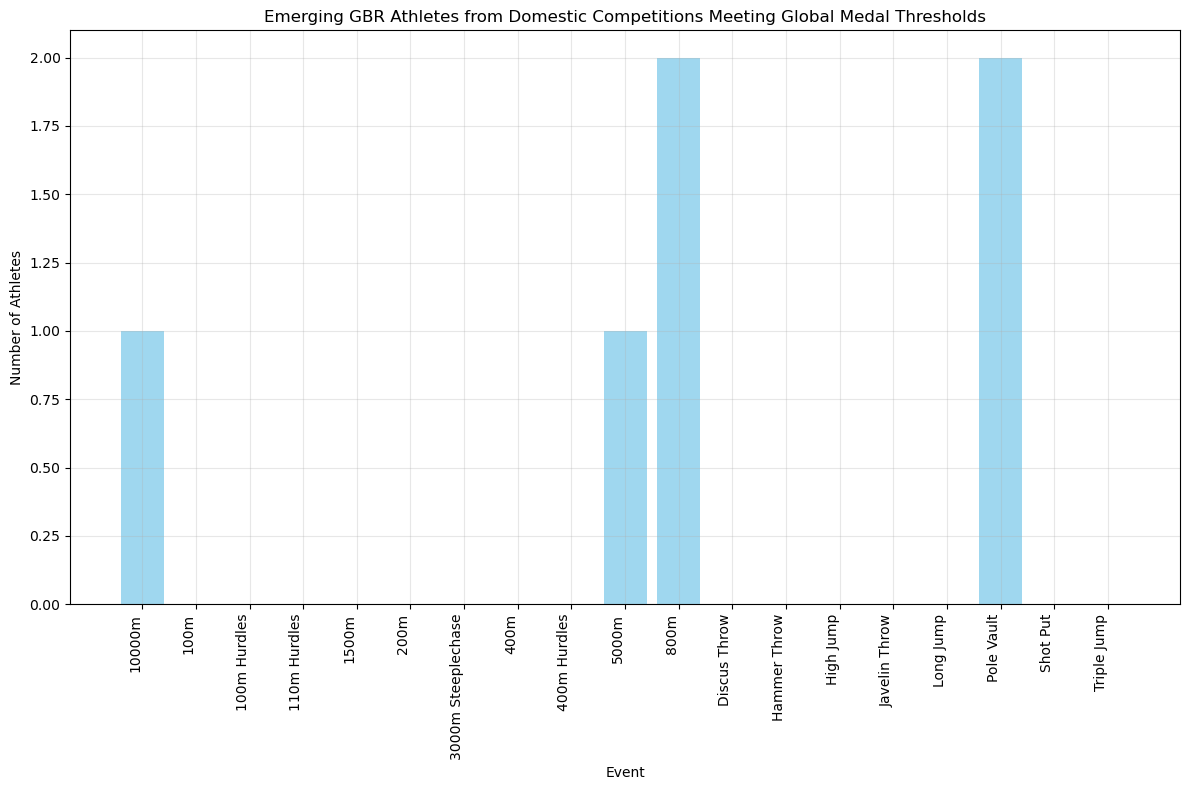

In [135]:
# Step 1: Filter Emerging Athletes from Domestic Competitions
emerging_athletes_domestic = gbr_medal_contenders[
    (gbr_medal_contenders['Flag'] == 'gbr')   # Domestic competitions only
]

# Step 2: Group by Event
emerging_athletes_count = emerging_athletes_domestic.groupby('EventName').size().reset_index(name='AthleteCount')

# Step 3: Plot Data
plt.figure(figsize=(12, 8))
plt.bar(emerging_athletes_count['EventName'], emerging_athletes_count['AthleteCount'], color='skyblue', alpha=0.8)

# Add Titles and Labels
plt.title("Emerging GBR Athletes from Domestic Competitions Meeting Global Medal Thresholds")
plt.xlabel("Event")
plt.ylabel("Number of Athletes")
plt.xticks(rotation=90, ha='right')
plt.grid(alpha=0.3)
plt.tight_layout()

# Display the Plot
plt.show()

#### Explanation
This visualization showcases GBR athletes competing domestically whose performances meet or exceed the global medal prediction thresholds, grouped by event. However, it is important to note that the same athlete might already be representing Great Britain at the global level in the same event. For instance, an athlete like Keely may appear here based solely on her domestic performance meeting the threshold, even though she is already competing globally. Therefore, while this visualization highlights performances that align with medal prediction benchmarks, it does not necessarily represent only emerging domestic talent, as it may also include globally competing athletes.

Limitation: The same athlete may already be representing Great Britain at the global level in the same event. For instance, an athlete like Keely may appear here based solely on her domestic performance meeting the threshold, even though she is already competing globally. While this visualization highlights performances aligned with medal prediction benchmarks, it cannot solely be interpreted as emerging domestic talent due to this overlap.”

## Recommendation

In [136]:
# medal_summary

In [137]:
# # Filter Events with No GBR Medal Contenders
# no_medal_summary = medal_summary[medal_summary["GBR_Medal_Contenders_Count"] < 1]
# no_medal_summary

In [138]:
# medal_summary

### Events to focus on/improve Globally

/var/folders/gg/b0_3ckcs3bl5wtpt9yqtc5lh0000gn/T/ipykernel_1509/832097484.py:2: FutureWarning:

The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior



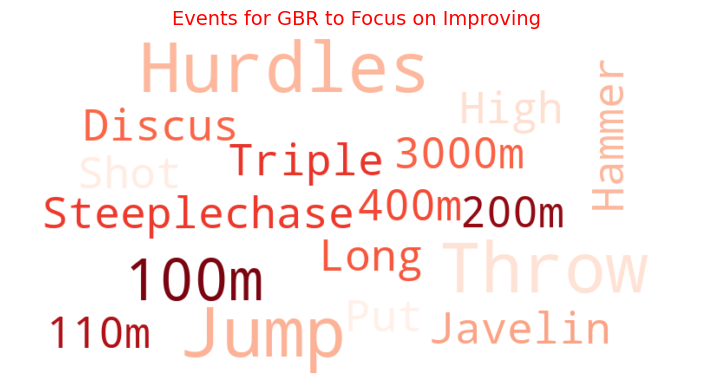

In [139]:
# Step 1: Filter events where GBR has no medal contenders across both genders
events_with_no_contenders = medal_summary.pivot_table(
    index='EventName',
    values='GBR_Medal_Contenders_Count',
    aggfunc='sum'
).reset_index()

# Keep only events with total GBR_Medal_Contenders_Count == 0
events_to_focus = events_with_no_contenders[events_with_no_contenders['GBR_Medal_Contenders_Count'] == 0]

# Extract the event names
event_names_to_focus = events_to_focus['EventName'].tolist()

# Step 2: Visualize as a word cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

event_text = " ".join(event_names_to_focus)  # Combine event names into a single string

wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="Reds",  # Reddish color scheme
    max_font_size=80,
    min_font_size=12
).generate(event_text)

# Step 3: Plot the word cloud
plt.figure(figsize=(8, 4))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Events for GBR to Focus on Improving", fontsize=14, color='red')
plt.tight_layout()
plt.show()

#### Explanation
visualization of the events where Great Britain is not predicted to win medals, highlighting areas for improvement in global competition. Events that appear larger in the word cloud may indicate repeated occurrences (e.g., different genders) or are emphasized for their significance.

In [140]:
# Listing the names of events with counts of occurrences
events_with_no_contenders_list = events_with_no_contenders[
    events_with_no_contenders['GBR_Medal_Contenders_Count'] == 0
]

# Rename columns for better clarity
events_with_no_contenders_list = events_with_no_contenders_list.rename(
    columns={'GBR_Medal_Contenders_Count': 'No_Contenders_Count'}
)

# Display the DataFrame
print(events_with_no_contenders_list)
print(events_with_no_contenders_list.count())

             EventName  No_Contenders_Count
1                 100m                    0
2         100m Hurdles                    0
3         110m Hurdles                    0
5                 200m                    0
6   3000m Steeplechase                    0
8         400m Hurdles                    0
11        Discus Throw                    0
12        Hammer Throw                    0
13           High Jump                    0
14       Javelin Throw                    0
15           Long Jump                    0
17            Shot Put                    0
18         Triple Jump                    0
EventName              13
No_Contenders_Count    13
dtype: int64


# Methodology Infographic

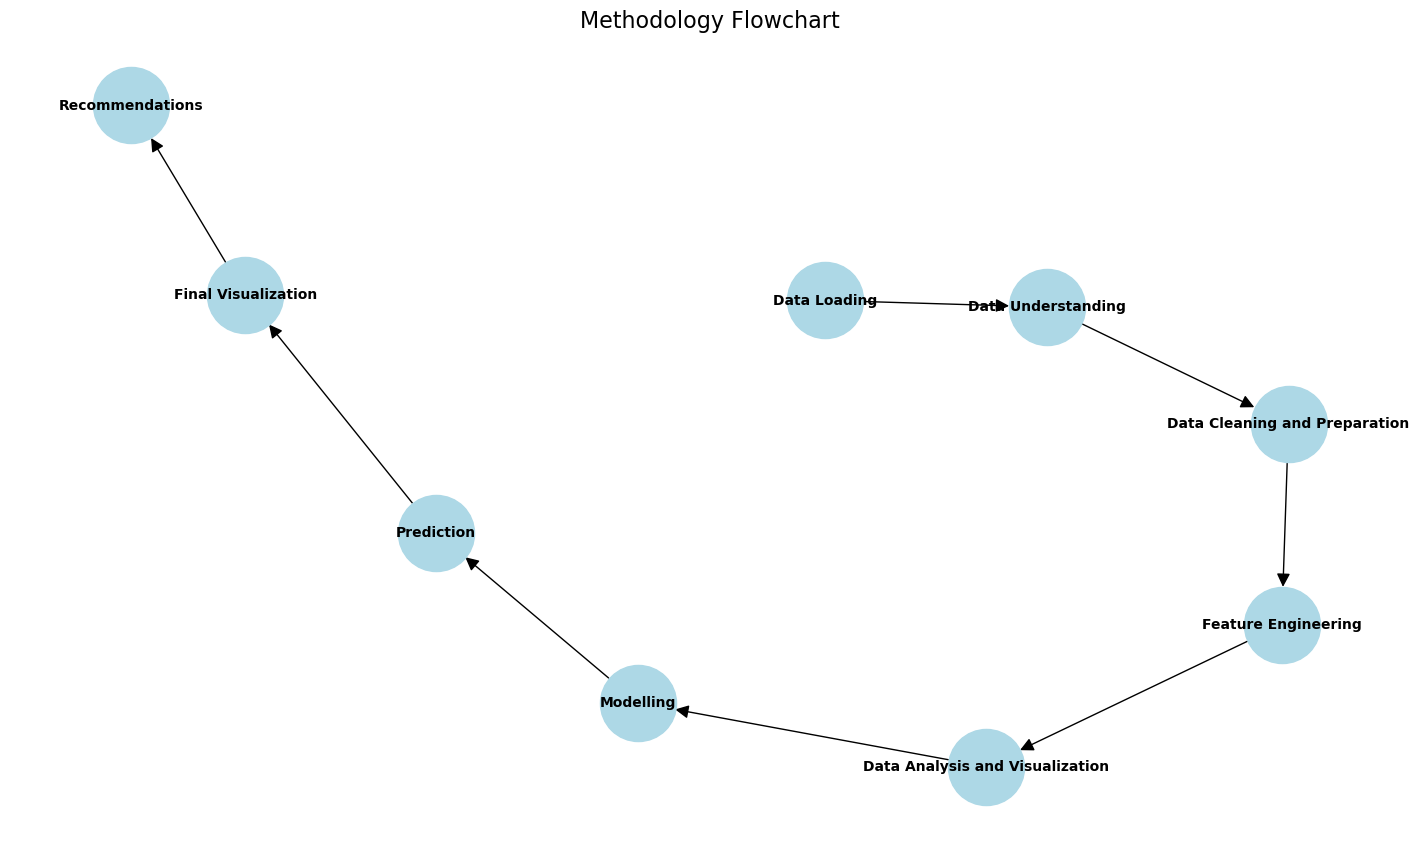

In [141]:
from matplotlib import pyplot as plt
import networkx as nx

# Define the steps of the methodology
methodology_steps = [
    "Data Loading",
    "Data Understanding",
    "Data Cleaning and Preparation",
    "Feature Engineering",
    "Data Analysis and Visualization",
    "Modelling",
    "Prediction",
    "Final Visualization",
    "Recommendations"
]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges
for i in range(len(methodology_steps) - 1):
    G.add_edge(methodology_steps[i], methodology_steps[i + 1])

# Draw the graph
plt.figure(figsize=(14, 8))
pos = nx.spring_layout(G, seed=42)  # Use a fixed layout for consistency
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", 
        font_size=10, font_weight="bold", arrowsize=20, edge_color="black")
plt.title("Methodology Flowchart", fontsize=16)
plt.show()

## Explanation
	1.	Data Loading: Load GBR and Global datasets into separate DataFrames.
	2.	Data Understanding: Explore datasets (shape, summary statistics, data types, missing values).
	3.	Data Cleaning and Preparation: Merge datasets, clean inconsistent athlete names, and filter relevant events as per the task.
	4.	Feature Engineering: Calculate performance thresholds and categorize athletes into time-based and distance-based events.
	5.	Data Analysis and Visualization:
	•	Use heatmaps for correlations.
	•	Plot distributions of performances against medal thresholds.
	•	Identify key trends and areas of improvement.
	6.	Modelling: Identify GBR medal contenders for time-based and distance-based events.
	7.	Prediction: Predict medal counts per event and summarize likely events where medals will be won.
	8.	Final Visualization: Create polished visualizations (bar charts, word clouds, summary tables).
	9.	Recommendations: Highlight focus areas and next steps for GBR Athletics.

# Scatter

In [142]:
# gbr_medal_contenders

In [143]:
# import matplotlib.pyplot as plt

# # Scatterplot for GBR athletes' performance vs. medal thresholds
# plt.figure(figsize=(10, 6))
# for event_type, group_data in all_info_finals.groupby('EventType'):
#     plt.scatter(
#         group_data['PerformanceValues'], 
#         group_data['MedalThreshold'], 
#         label=f"{event_type.capitalize()} Events"
#     )

# plt.axhline(y=0, color='gray', linestyle='--', label="Medal Threshold")
# plt.title('GBR Athletes vs Medal Thresholds')
# plt.xlabel('Performance Values')
# plt.ylabel('Medal Thresholds')
# plt.legend()
# plt.grid()
# plt.show()

In [144]:
# import seaborn as sns

# # Boxplot for GBR athletes' performance distribution
# plt.figure(figsize=(12, 6))
# sns.boxplot(
#     x='EventName', 
#     y='PerformanceValues', 
#     data=all_info_finals[all_info_finals['Nationality'] == 'gbr']
# )
# plt.axhline(y=0, color='red', linestyle='--', label="Medal Threshold")
# plt.xticks(rotation=45, ha='right')
# plt.title('Distribution of GBR Performances by Event')
# plt.xlabel('Event Name')
# plt.ylabel('Performance Values')
# plt.legend()
# plt.tight_layout()
# plt.show()

In [145]:
# # Histogram of GBR athletes' performance
# plt.figure(figsize=(10, 6))
# plt.hist(
#     all_info_finals[all_info_finals['Nationality'] == 'gbr']['PerformanceValues'], 
#     bins=20, color='blue', alpha=0.7, label='GBR Performances'
# )
# plt.axvline(x=0, color='red', linestyle='--', label='Medal Threshold')
# plt.title('Frequency of GBR Athletes’ Performances')
# plt.xlabel('Performance Values')
# plt.ylabel('Frequency')
# plt.legend()
# plt.grid()
# plt.show()